## Practical5b

The goal of this part of the practical is to use the dynamic programming
routine that you developed in the first part to solve the dense stero problem.

Use the template below, filling in parts marked "TO DO".


In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np 
from scipy.io import loadmat
import matplotlib.pyplot as plt
import time
from functions import dynamicProgram, dynamicProgramVec
plt.close('all')

In [2]:
# load in images and ground truth
data = loadmat('StereoData.mat')
im1 = data['im1'].astype('int')
im2 = data['im2'].astype('int')
gt = data['gt'].astype('int')

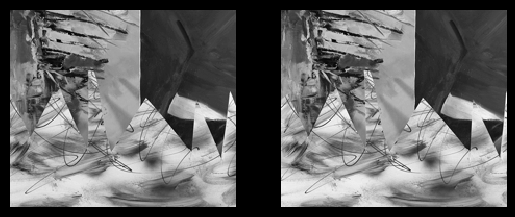

In [3]:
# ground truth disparity is originally expressed in 16'ths of pixels but we 
# will only consider whole-pixel shifts
gtDisp = np.round(gt.astype(float)/16)

im1show = im1
im2show = im2
if np.max(im1) > 1:
    im1show = im1.astype(float)/255.
    im2show = im2.astype(float)/255.
    
# display image
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(im1, cmap='gray', interpolation='nearest', aspect=1)
ax1.axis('off')
ax2.imshow(im2, cmap='gray', interpolation='nearest', aspect=1)
ax2.axis('off')
plt.show()

### Complete the TODOs in the final cell below

Here we are going to make use of the "dynamicProgram" function we just wrote.

We will first calculate the unary costs before using our function to calculate estimated disparity.

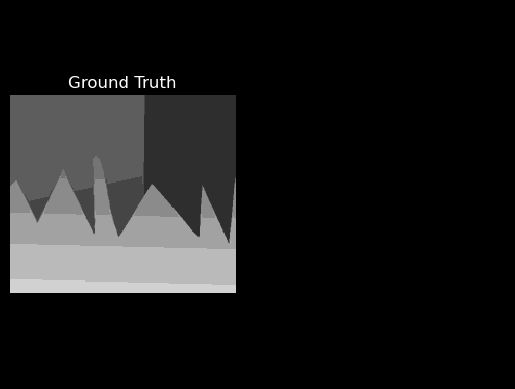

Procesing scanline  0
[[   8.73977304   24.97954609   28.3859858  ... 4553.32014071
  4555.33769153 4557.41079791]
 [          inf   29.75732387   29.3859858  ... 4554.48680737
  4556.39324708 4558.57746457]
 [          inf           inf   30.71931913 ... 4554.76458515
  4556.55991375 4558.85524235]
 ...
 [          inf           inf           inf ... 4556.26458515
  4558.33769153 4562.85524235]
 [          inf           inf           inf ... 4556.98680737
  4558.33769153 4561.91079791]
 [          inf           inf           inf ... 4558.76458515
  4559.05991375 4561.91079791]]


C:\Users\86189\AppData\Local\Temp\ipykernel_16976\4227658273.py:48: RuntimeWarning: divide by zero encountered in log
  cost[cX] = -np.log(np.exp(-0.5 * (diff/noiseSD)**2) / (np.sqrt(2 * np.pi) * noiseSD))


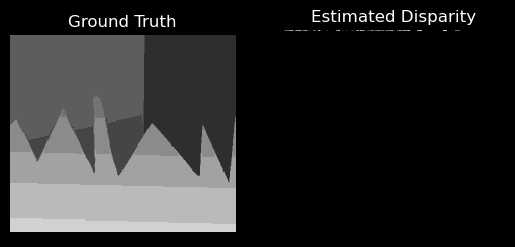

Procesing scanline  1
[[5.57310638e+00 1.11462128e+01 1.36637636e+01 ... 5.72520903e+03
  5.72722658e+03 5.72924413e+03]
 [           inf 1.30906572e+01 1.46637636e+01 ... 5.72637570e+03
  5.72822658e+03 5.73029969e+03]
 [           inf            inf 1.43859858e+01 ... 5.72754236e+03
  5.72828214e+03 5.73029969e+03]
 ...
 [           inf            inf            inf ... 5.72887570e+03
  5.73022658e+03 5.73224413e+03]
 [           inf            inf            inf ... 5.72970903e+03
  5.73022658e+03 5.73296635e+03]
 [           inf            inf            inf ... 5.73170903e+03
  5.73094880e+03 5.73296635e+03]]


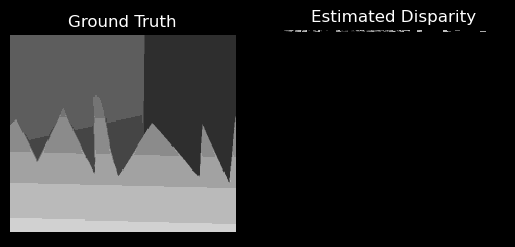

Procesing scanline  2
[[   5.57310638    8.47954609   19.8859858  ... 5490.7090296
  5492.78213597 5494.85524235]
 [          inf   12.14621275   15.99709691 ... 5491.7090296
  5493.94880264 5496.02190902]
 [          inf           inf   11.99709691 ... 5492.54236293
  5493.94880264 5496.29968679]
 ...
 [          inf           inf           inf ... 5493.04236293
  5495.72658042 5498.52190902]
 [          inf           inf           inf ... 5494.37569626
  5495.72658042 5498.52190902]
 [          inf           inf           inf ... 5496.15347404
  5497.28213597 5498.52190902]]


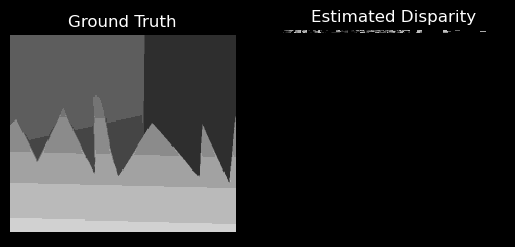

Procesing scanline  3
[[2.51755082e+00 5.03510164e+00 7.05265247e+00 ... 3.82626459e+03
  3.82850436e+03 3.83057746e+03]
 [           inf 1.35351016e+01 1.00526525e+01 ... 3.82726459e+03
  3.82950436e+03 3.83174413e+03]
 [           inf            inf 1.25526525e+01 ... 3.82748681e+03
  3.82950436e+03 3.83174413e+03]
 ...
 [           inf            inf            inf ... 3.82865347e+03
  3.83128214e+03 3.83507746e+03]
 [           inf            inf            inf ... 3.82926459e+03
  3.83200436e+03 3.83352191e+03]
 [           inf            inf            inf ... 3.83082014e+03
  3.83283769e+03 3.83424413e+03]]


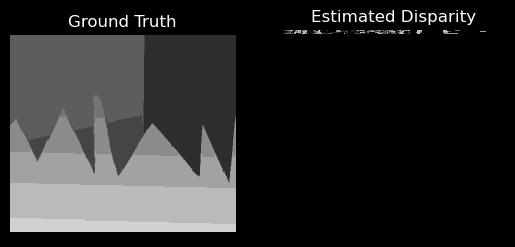

Procesing scanline  4
[[  20.01755082   22.03510164   24.27487469 ... 4502.54236293
  4504.61546931 4506.68857568]
 [          inf   23.53510164   25.55265247 ... 4503.37569626
  4505.61546931 4507.85524235]
 [          inf           inf   25.05265247 ... 4503.82014071
  4505.61546931 4508.13302013]
 ...
 [          inf           inf           inf ... 4506.04236293
  4508.28213597 4511.18857568]
 [          inf           inf           inf ... 4505.32014071
  4508.28213597 4511.18857568]
 [          inf           inf           inf ... 4506.87569626
  4507.55991375 4511.18857568]]


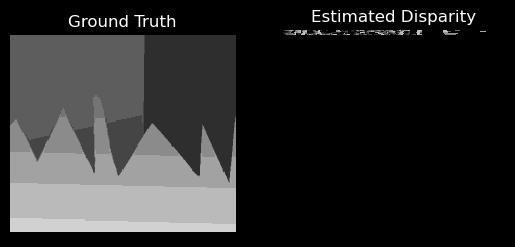

Procesing scanline  5
[[4.01755082e+00 6.09065720e+00 8.16376358e+00 ... 5.15676459e+03
  5.15883769e+03 5.16085524e+03]
 [           inf 8.42399053e+00 9.99709691e+00 ... 5.15776459e+03
  5.16000436e+03 5.16207746e+03]
 [           inf            inf 9.33043024e+00 ... 5.15815347e+03
  5.16000436e+03 5.16235524e+03]
 ...
 [           inf            inf            inf ... 5.16282014e+03
  5.16428214e+03 5.16457746e+03]
 [           inf            inf            inf ... 5.16082014e+03
  5.16428214e+03 5.16741080e+03]
 [           inf            inf            inf ... 5.16082014e+03
  5.16250436e+03 5.16741080e+03]]


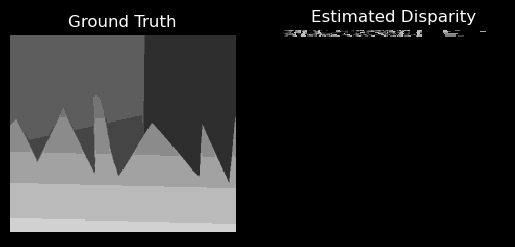

Procesing scanline  6
[[2.23977304e+00 4.31287942e+00 7.21931913e+00 ... 3.96648681e+03
  3.96855991e+03 3.97063302e+03]
 [           inf 1.46462128e+01 9.33043024e+00 ... 3.96765347e+03
  3.96950436e+03 3.97174413e+03]
 [           inf            inf 9.33043024e+00 ... 3.96765347e+03
  3.96955991e+03 3.97207746e+03]
 ...
 [           inf            inf            inf ... 3.97015347e+03
  3.97089325e+03 3.97513302e+03]
 [           inf            inf            inf ... 3.97098681e+03
  3.97150436e+03 3.97513302e+03]
 [           inf            inf            inf ... 3.96943125e+03
  3.97222658e+03 3.97607746e+03]]


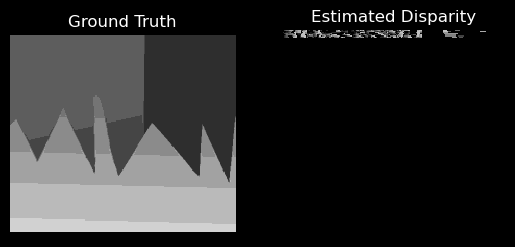

Procesing scanline  7
[[2.01755082e+00 8.53510164e+00 2.30526525e+01 ... 4.78932014e+03
  4.79133769e+03 4.79385524e+03]
 [           inf 9.53510164e+00 1.82748747e+01 ... 4.79054236e+03
  4.79239325e+03 4.79457746e+03]
 [           inf            inf 1.82748747e+01 ... 4.79054236e+03
  4.79283769e+03 4.79485524e+03]
 ...
 [           inf            inf            inf ... 4.79304236e+03
  4.79589325e+03 4.79885524e+03]
 [           inf            inf            inf ... 4.79232014e+03
  4.79589325e+03 4.79991080e+03]
 [           inf            inf            inf ... 4.79482014e+03
  4.79505991e+03 4.79991080e+03]]


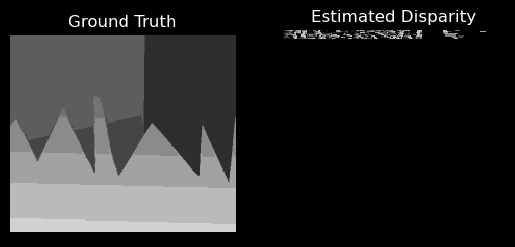

Procesing scanline  8
[[3.40643971e+00 5.47954609e+00 1.19970969e+01 ... 3.78715347e+03
  3.78939325e+03 3.79141080e+03]
 [           inf 6.47954609e+00 2.64970969e+01 ... 3.78815347e+03
  3.79039325e+03 3.79263302e+03]
 [           inf            inf 2.64970969e+01 ... 3.78843125e+03
  3.79039325e+03 3.79263302e+03]
 ...
 [           inf            inf            inf ... 3.79148681e+03
  3.79217102e+03 3.79513302e+03]
 [           inf            inf            inf ... 3.79348681e+03
  3.79372658e+03 3.79441080e+03]
 [           inf            inf            inf ... 3.79348681e+03
  3.79572658e+03 3.79596635e+03]]


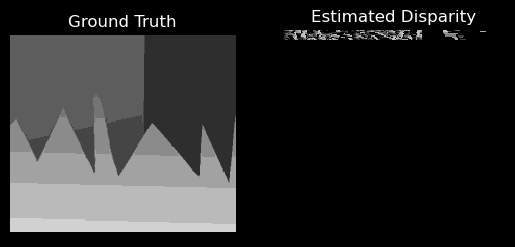

Procesing scanline  9
[[2.23977304e+00 6.25732387e+00 2.07748747e+01 ... 3.44698681e+03
  3.44905991e+03 3.45157746e+03]
 [           inf 5.31287942e+00 1.53304302e+01 ... 3.44843125e+03
  3.45000436e+03 3.45224413e+03]
 [           inf            inf 2.43859858e+01 ... 3.44843125e+03
  3.45022658e+03 3.45213302e+03]
 ...
 [           inf            inf            inf ... 3.45465347e+03
  3.45200436e+03 3.45346635e+03]
 [           inf            inf            inf ... 3.45348681e+03
  3.45555991e+03 3.45346635e+03]
 [           inf            inf            inf ... 3.45148681e+03
  3.45450436e+03 3.45657746e+03]]


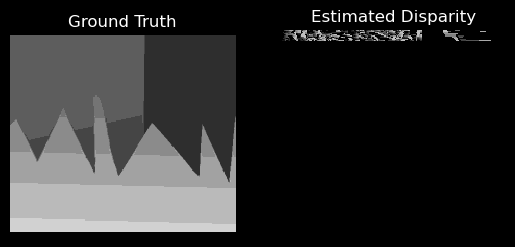

Procesing scanline  10
[[  12.90643971   20.47954609   36.71931913 ... 3648.98680737
  3651.05991375 3653.29968679]
 [          inf   30.14621275   25.49709691 ... 3650.2090296
  3652.05991375 3654.29968679]
 [          inf           inf   23.49709691 ... 3650.48680737
  3652.05991375 3654.29968679]
 ...
 [          inf           inf           inf ... 3653.54236293
  3654.72658042 3654.96635346]
 [          inf           inf           inf ... 3653.54236293
  3654.72658042 3656.07746457]
 [          inf           inf           inf ... 3654.48680737
  3654.72658042 3656.07746457]]


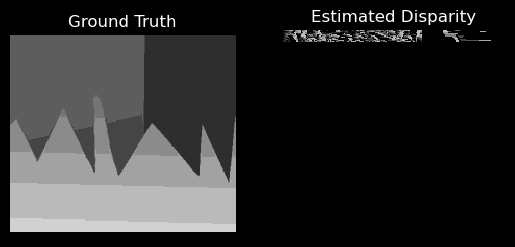

Procesing scanline  11
[[4.01755082e+00 1.05351016e+01 1.69970969e+01 ... 4.44287570e+03
  4.44539325e+03 4.44791080e+03]
 [           inf 7.25732387e+00 2.17748747e+01 ... 4.44382014e+03
  4.44605991e+03 4.44946635e+03]
 [           inf            inf 1.38304302e+01 ... 4.44387570e+03
  4.44594880e+03 4.44885524e+03]
 ...
 [           inf            inf            inf ... 4.44737570e+03
  4.44728214e+03 4.44846635e+03]
 [           inf            inf            inf ... 4.44737570e+03
  4.44861547e+03 4.44891080e+03]
 [           inf            inf            inf ... 4.44832014e+03
  4.44861547e+03 4.44979969e+03]]


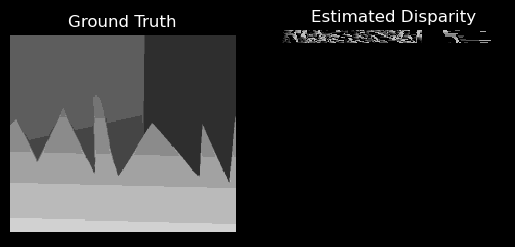

Procesing scanline  12
[[2.90643971e+00 8.47954609e+00 4.09970969e+01 ... 3.86987570e+03
  3.87211547e+03 3.87418858e+03]
 [           inf 5.97954609e+00 2.59970969e+01 ... 3.87087570e+03
  3.87311547e+03 3.87535524e+03]
 [           inf            inf 1.34970969e+01 ... 3.87104236e+03
  3.87311547e+03 3.87535524e+03]
 ...
 [           inf            inf            inf ... 3.87220903e+03
  3.87294880e+03 3.87496635e+03]
 [           inf            inf            inf ... 3.87354236e+03
  3.87378214e+03 3.87518858e+03]
 [           inf            inf            inf ... 3.87354236e+03
  3.87489325e+03 3.87602191e+03]]


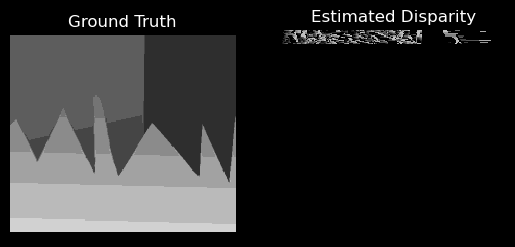

Procesing scanline  13
[[2.90643971e+00 1.04795461e+01 1.45526525e+01 ... 3.08037570e+03
  3.08261547e+03 3.08485524e+03]
 [           inf 5.97954609e+00 1.47193191e+01 ... 3.08165347e+03
  3.08339325e+03 3.08563302e+03]
 [           inf            inf 9.21931913e+00 ... 3.08165347e+03
  3.08344880e+03 3.08546635e+03]
 ...
 [           inf            inf            inf ... 3.08137570e+03
  3.08361547e+03 3.08613302e+03]
 [           inf            inf            inf ... 3.08137570e+03
  3.08344880e+03 3.08568858e+03]
 [           inf            inf            inf ... 3.08315347e+03
  3.08428214e+03 3.08568858e+03]]


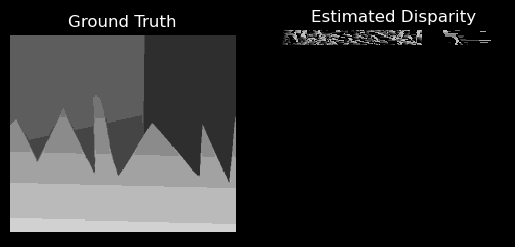

Procesing scanline  14
[[2.51755082e+00 7.25732387e+00 1.59970969e+01 ... 3.40509792e+03
  3.40733769e+03 3.41135524e+03]
 [           inf 9.09065720e+00 1.38304302e+01 ... 3.40570903e+03
  3.40778214e+03 3.41335524e+03]
 [           inf            inf 1.47748747e+01 ... 3.40515347e+03
  3.40717102e+03 3.41191080e+03]
 ...
 [           inf            inf            inf ... 3.40576459e+03
  3.40800436e+03 3.41274413e+03]
 [           inf            inf            inf ... 3.40504236e+03
  3.40794880e+03 3.41352191e+03]
 [           inf            inf            inf ... 3.40782014e+03
  3.40783769e+03 3.41007746e+03]]


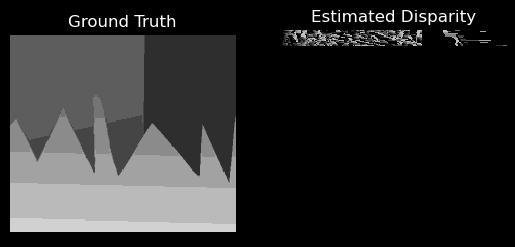

Procesing scanline  15
[[   5.57310638   21.81287942   51.8859858  ... 2890.87569626
  2897.39324708 2903.74413124]
 [          inf   19.47954609   48.3859858  ... 2890.43125182
  2899.17102486 2907.91079791]
 [          inf           inf   44.71931913 ... 2890.54236293
  2896.11546931 2911.24413124]
 ...
 [          inf           inf           inf ... 2891.65347404
  2898.55991375 2906.41079791]
 [          inf           inf           inf ... 2890.37569626
  2899.11546931 2909.52190902]
 [          inf           inf           inf ... 2891.87569626
  2895.72658042 2911.24413124]]


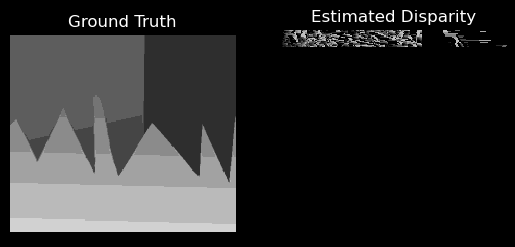

Procesing scanline  16
[[   8.73977304   24.97954609   27.49709691 ... 3552.82014071
  3559.55991375 3561.79968679]
 [          inf   24.25732387   32.99709691 ... 3551.82014071
  3563.22658042 3564.57746457]
 [          inf           inf   32.83043024 ... 3552.76458515
  3560.72658042 3567.07746457]
 ...
 [          inf           inf           inf ... 3554.98680737
  3563.39324708 3564.57746457]
 [          inf           inf           inf ... 3557.65347404
  3564.89324708 3567.07746457]
 [          inf           inf           inf ... 3554.98680737
  3568.22658042 3568.13302013]]


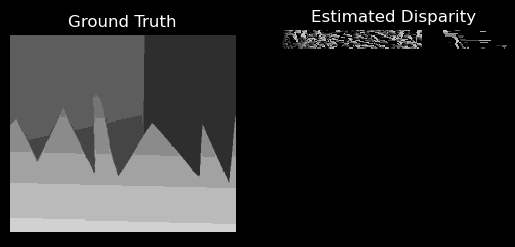

Procesing scanline  17
[[   6.51755082    8.5906572    11.99709691 ... 4105.54236293
  4107.61546931 4111.02190902]
 [          inf    9.5906572    12.10820802 ... 4109.04236293
  4110.55991375 4111.13302013]
 [          inf           inf   11.66376358 ... 4109.43125182
  4113.05991375 4111.52190902]
 ...
 [          inf           inf           inf ... 4109.04236293
  4113.05991375 4115.13302013]
 [          inf           inf           inf ... 4110.43125182
  4113.05991375 4113.35524235]
 [          inf           inf           inf ... 4113.54236293
  4114.11546931 4113.35524235]]


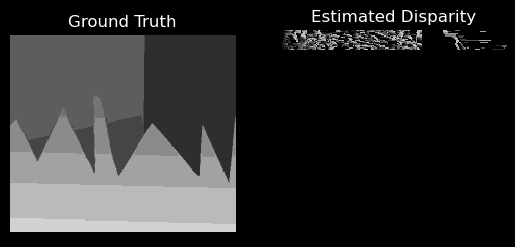

Procesing scanline  18
[[4.01755082e+00 9.59065720e+00 1.09970969e+01 ... 5.34004236e+03
  5.34255991e+03 5.34507746e+03]
 [           inf 7.92399053e+00 1.79415414e+01 ... 5.34376459e+03
  5.34305991e+03 5.34779969e+03]
 [           inf            inf 1.44970969e+01 ... 5.34554236e+03
  5.34578214e+03 5.34646635e+03]
 ...
 [           inf            inf            inf ... 5.34554236e+03
  5.34978214e+03 5.35357746e+03]
 [           inf            inf            inf ... 5.34659792e+03
  5.34755991e+03 5.34829969e+03]
 [           inf            inf            inf ... 5.34659792e+03
  5.34861547e+03 5.34696635e+03]]


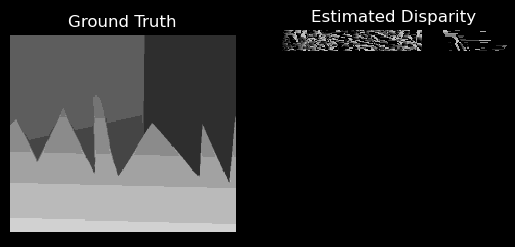

Procesing scanline  19
[[3.40643971e+00 1.48128794e+01 3.83859858e+01 ... 7.39526459e+03
  7.39750436e+03 7.40224413e+03]
 [           inf 1.31462128e+01 2.76637636e+01 ... 7.39493125e+03
  7.39967102e+03 7.40324413e+03]
 [           inf            inf 2.55526525e+01 ... 7.39687570e+03
  7.39844880e+03 7.40846635e+03]
 ...
 [           inf            inf            inf ... 7.40043125e+03
  7.40594880e+03 7.40252191e+03]
 [           inf            inf            inf ... 7.39843125e+03
  7.40150436e+03 7.40324413e+03]
 [           inf            inf            inf ... 7.39937570e+03
  7.39994880e+03 7.40102191e+03]]


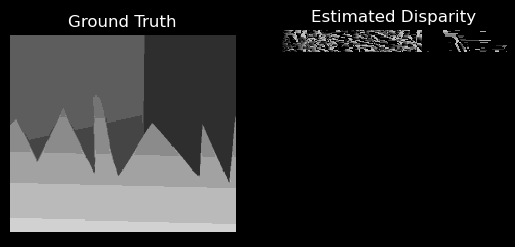

Procesing scanline  20
[[ 7.57310638  9.64621275 43.66376358 ...         inf         inf
          inf]
 [        inf 11.97954609 13.55265247 ...         inf         inf
          inf]
 [        inf         inf 12.66376358 ...         inf         inf
          inf]
 ...
 [        inf         inf         inf ...         inf         inf
          inf]
 [        inf         inf         inf ...         inf         inf
          inf]
 [        inf         inf         inf ...         inf         inf
          inf]]


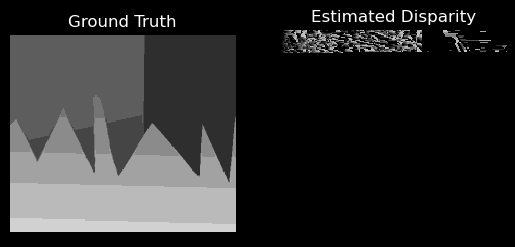

Procesing scanline  21
[[3.40643971e+00 8.14621275e+00 4.21637636e+01 ... 5.51087570e+03
  5.51294880e+03 5.51585524e+03]
 [           inf 1.58128794e+01 3.56637636e+01 ... 5.51237570e+03
  5.51389325e+03 5.51591080e+03]
 [           inf            inf 5.16637636e+01 ... 5.51537570e+03
  5.51433769e+03 5.51596635e+03]
 ...
 [           inf            inf            inf ... 5.51104236e+03
  5.51355991e+03 5.51696635e+03]
 [           inf            inf            inf ... 5.51220903e+03
  5.51522658e+03 5.51685524e+03]
 [           inf            inf            inf ... 5.51220903e+03
  5.51739325e+03 5.51796635e+03]]


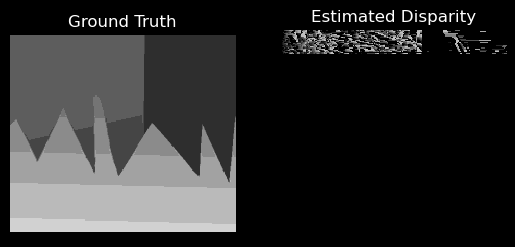

Procesing scanline  22
[[2.23977304e+00 6.25732387e+00 4.58304302e+01 ... 5.80604236e+03
  5.80894880e+03 5.81052191e+03]
 [           inf 2.13128794e+01 1.01637636e+01 ... 5.80654236e+03
  5.80828214e+03 5.81052191e+03]
 [           inf            inf 4.97748747e+01 ... 5.80654236e+03
  5.80844880e+03 5.81096635e+03]
 ...
 [           inf            inf            inf ... 5.80520903e+03
  5.80744880e+03 5.81035524e+03]
 [           inf            inf            inf ... 5.80537570e+03
  5.80744880e+03 5.80946635e+03]
 [           inf            inf            inf ... 5.80604236e+03
  5.80944880e+03 5.81052191e+03]]


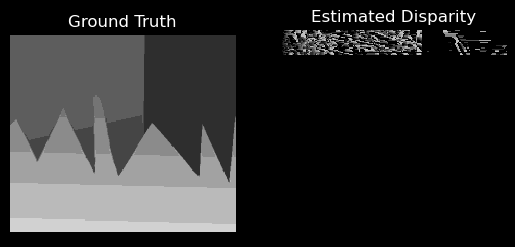

Procesing scanline  23
[[2.01755082e+00 4.03510164e+00 3.54415414e+01 ... 5.94543125e+03
  5.94661547e+03 5.94885524e+03]
 [           inf 2.10906572e+01 7.55265247e+00 ... 5.94404236e+03
  5.94694880e+03 5.95035524e+03]
 [           inf            inf 2.92748747e+01 ... 5.94409792e+03
  5.94617102e+03 5.95018858e+03]
 ...
 [           inf            inf            inf ... 5.94382014e+03
  5.94633769e+03 5.94857746e+03]
 [           inf            inf            inf ... 5.94426459e+03
  5.94617102e+03 5.94957746e+03]
 [           inf            inf            inf ... 5.94604236e+03
  5.94633769e+03 5.94885524e+03]]


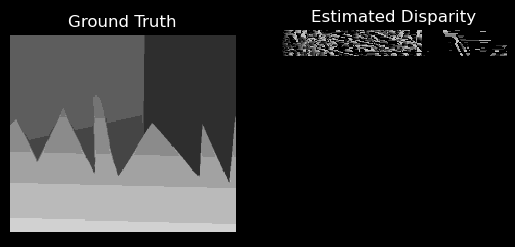

Procesing scanline  24
[[ 6.51755082  8.75732387 64.16376358 ...         inf         inf
          inf]
 [        inf 25.5906572  13.16376358 ...         inf         inf
          inf]
 [        inf         inf 33.99709691 ...         inf         inf
          inf]
 ...
 [        inf         inf         inf ...         inf         inf
          inf]
 [        inf         inf         inf ...         inf         inf
          inf]
 [        inf         inf         inf ...         inf         inf
          inf]]


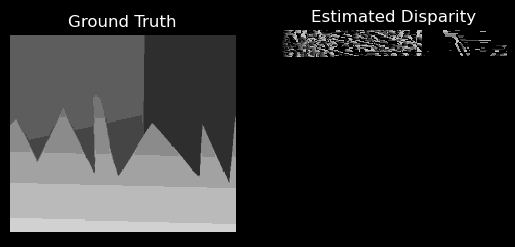

Procesing scanline  25
[[   5.57310638   23.64621275   93.71931913 ... 5507.54236293
  5509.55991375 5511.79968679]
 [          inf   30.81287942   37.55265247 ... 5508.32014071
  5510.39324708 5512.46635346]
 [          inf           inf   42.71931913 ... 5508.59791848
  5510.55991375 5512.79968679]
 ...
 [          inf           inf           inf ... 5508.76458515
  5511.05991375 5512.79968679]
 [          inf           inf           inf ... 5508.76458515
  5511.05991375 5513.46635346]
 [          inf           inf           inf ... 5508.76458515
  5510.61546931 5513.46635346]]


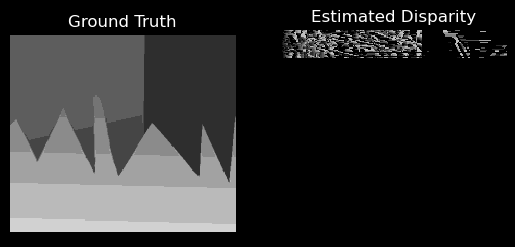

Procesing scanline  26
[[   6.51755082   21.03510164  103.77487469 ... 5263.15347404
  5265.22658042 5267.29968679]
 [          inf   16.25732387   30.77487469 ... 5263.54236293
  5265.78213597 5267.79968679]
 [          inf           inf   25.99709691 ... 5264.26458515
  5266.67102486 5268.29968679]
 ...
 [          inf           inf           inf ... 5263.98680737
  5266.50435819 5269.13302013]
 [          inf           inf           inf ... 5264.2090296
  5266.22658042 5268.46635346]
 [          inf           inf           inf ... 5263.82014071
  5266.33769153 5268.24413124]]


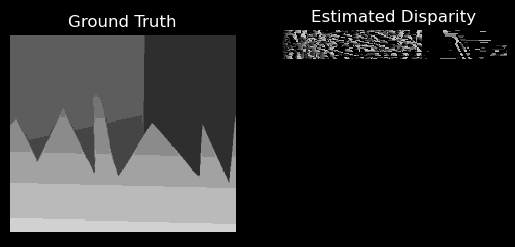

Procesing scanline  27
[[   7.57310638   13.14621275   87.16376358 ... 6021.82014071
  6023.89324708 6026.41079791]
 [          inf   16.14621275   25.55265247 ... 6022.09791848
  6024.17102486 6026.41079791]
 [          inf           inf   28.66376358 ... 6022.93125182
  6024.89324708 6027.13302013]
 ...
 [          inf           inf           inf ... 6022.09791848
  6025.50435819 6028.29968679]
 [          inf           inf           inf ... 6022.04236293
  6024.55991375 6030.13302013]
 [          inf           inf           inf ... 6021.93125182
  6023.94880264 6027.96635346]]


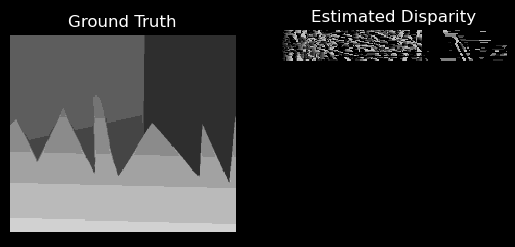

Procesing scanline  28
[[   8.73977304   12.14621275  126.66376358 ... 4183.76458515
  4186.00435819 4188.07746457]
 [          inf   19.75732387   19.66376358 ... 4184.59791848
  4186.83769153 4189.07746457]
 [          inf           inf   29.3859858  ... 4184.65347404
  4186.89324708 4189.13302013]
 ...
 [          inf           inf           inf ... 4184.98680737
  4188.17102486 4190.41079791]
 [          inf           inf           inf ... 4184.26458515
  4188.28213597 4190.41079791]
 [          inf           inf           inf ... 4184.32014071
  4186.83769153 4190.85524235]]


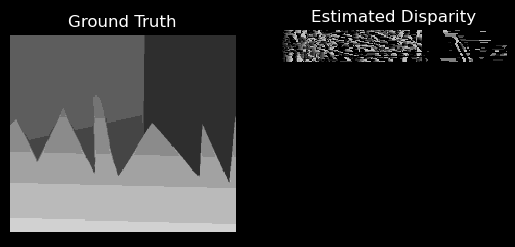

Procesing scanline  29
[[  11.40643971   14.81287942  114.83043024 ... 3512.76458515
  3515.28213597 3517.35524235]
 [          inf   22.42399053   17.8859858  ... 3512.32014071
  3514.83769153 3516.91079791]
 [          inf           inf   35.83043024 ... 3512.43125182
  3514.50435819 3516.57746457]
 ...
 [          inf           inf           inf ... 3512.98680737
  3515.89324708 3518.91079791]
 [          inf           inf           inf ... 3512.82014071
  3516.22658042 3517.74413124]
 [          inf           inf           inf ... 3512.65347404
  3516.05991375 3518.02190902]]


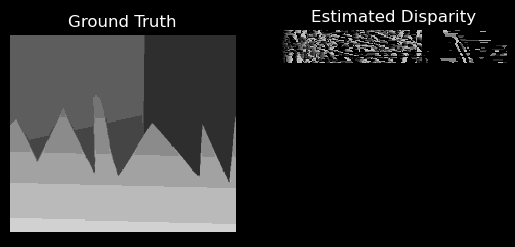

Procesing scanline  30
[[   5.57310638   14.31287942   75.66376358 ... 3369.82014071
  3371.89324708 3373.91079791]
 [          inf   12.14621275   16.8859858  ... 3369.76458515
  3372.28213597 3374.29968679]
 [          inf           inf   23.16376358 ... 3369.7090296
  3371.94880264 3374.85524235]
 ...
 [          inf           inf           inf ... 3370.04236293
  3373.44880264 3376.91079791]
 [          inf           inf           inf ... 3369.98680737
  3372.22658042 3376.24413124]
 [          inf           inf           inf ... 3370.82014071
  3372.94880264 3375.41079791]]


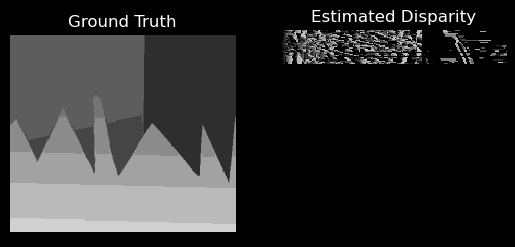

Procesing scanline  31
[[  18.07310638   36.14621275   61.8859858  ... 3340.2090296
  3342.44880264 3344.52190902]
 [          inf   31.97954609   44.8859858  ... 3341.26458515
  3343.28213597 3345.35524235]
 [          inf           inf   51.05265247 ... 3341.43125182
  3343.22658042 3345.24413124]
 ...
 [          inf           inf           inf ... 3342.59791848
  3344.11546931 3345.96635346]
 [          inf           inf           inf ... 3341.43125182
  3344.11546931 3346.85524235]
 [          inf           inf           inf ... 3341.7090296
  3343.28213597 3346.68857568]]


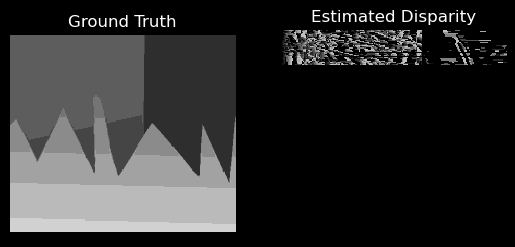

Procesing scanline  32
[[  20.01755082   46.53510164   59.94154135 ... 3344.48680737
  3346.50435819 3348.57746457]
 [          inf   32.42399053   54.49709691 ... 3345.43125182
  3347.44880264 3349.46635346]
 [          inf           inf   47.94154135 ... 3345.48680737
  3347.55991375 3349.52190902]
 ...
 [          inf           inf           inf ... 3346.32014071
  3348.00435819 3350.02190902]
 [          inf           inf           inf ... 3345.93125182
  3348.89324708 3350.02190902]
 [          inf           inf           inf ... 3345.93125182
  3348.39324708 3350.91079791]]


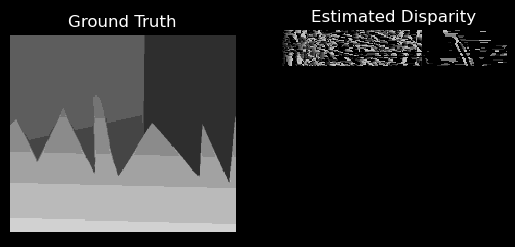

Procesing scanline  33
[[  10.01755082   28.0906572    46.10820802 ... 3993.43125182
  3995.44880264 3997.52190902]
 [          inf   18.5906572    33.10820802 ... 3994.65347404
  3996.50435819 3998.46635346]
 [          inf           inf   29.60820802 ... 3994.26458515
  3996.50435819 3998.52190902]
 ...
 [          inf           inf           inf ... 3994.15347404
  3996.39324708 3998.63302013]
 [          inf           inf           inf ... 3994.15347404
  3997.05991375 3998.68857568]
 [          inf           inf           inf ... 3993.93125182
  3996.83769153 3999.35524235]]


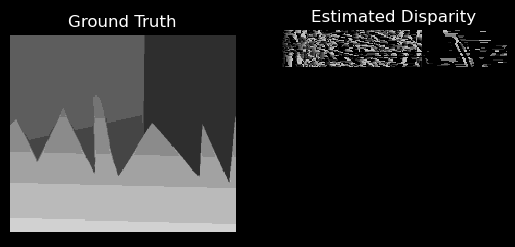

Procesing scanline  34
[[2.23977304e+00 2.43128794e+01 4.32193191e+01 ... 3.61048681e+03
  3.61250436e+03 3.61457746e+03]
 [           inf 5.47954609e+00 2.97193191e+01 ... 3.61159792e+03
  3.61372658e+03 3.61552191e+03]
 [           inf            inf 8.99709691e+00 ... 3.61170903e+03
  3.61400436e+03 3.61574413e+03]
 ...
 [           inf            inf            inf ... 3.61120903e+03
  3.61372658e+03 3.61602191e+03]
 [           inf            inf            inf ... 3.61187570e+03
  3.61400436e+03 3.61602191e+03]
 [           inf            inf            inf ... 3.61237570e+03
  3.61489325e+03 3.61602191e+03]]


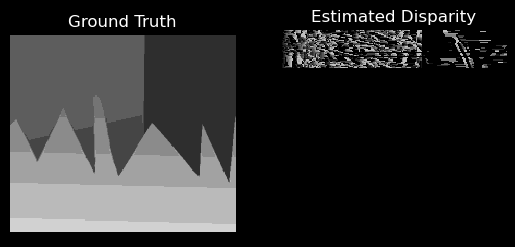

Procesing scanline  35
[[   5.57310638   32.0906572    29.3859858  ... 5150.09791848
  5152.17102486 5154.18857568]
 [          inf   12.14621275   41.05265247 ... 5151.32014071
  5153.11546931 5155.13302013]
 [          inf           inf   19.66376358 ... 5151.26458515
  5153.33769153 5155.24413124]
 ...
 [          inf           inf           inf ... 5153.04236293
  5154.50435819 5156.07746457]
 [          inf           inf           inf ... 5152.43125182
  5155.83769153 5156.07746457]
 [          inf           inf           inf ... 5153.04236293
  5155.11546931 5157.18857568]]


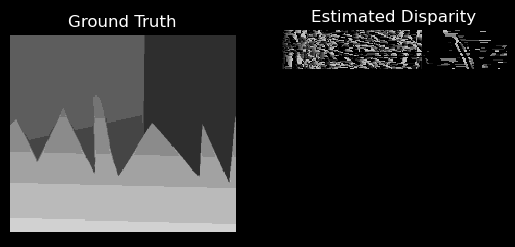

Procesing scanline  36
[[3.40643971e+00 1.09795461e+01 1.49970969e+01 ... 5.31465347e+03
  5.31667102e+03 5.31868858e+03]
 [           inf 8.42399053e+00 1.59970969e+01 ... 5.31559792e+03
  5.31761547e+03 5.31968858e+03]
 [           inf            inf 1.34415414e+01 ... 5.31559792e+03
  5.31761547e+03 5.31968858e+03]
 ...
 [           inf            inf            inf ... 5.31832014e+03
  5.32122658e+03 5.32524413e+03]
 [           inf            inf            inf ... 5.31832014e+03
  5.32122658e+03 5.32241080e+03]
 [           inf            inf            inf ... 5.31648681e+03
  5.32122658e+03 5.32241080e+03]]


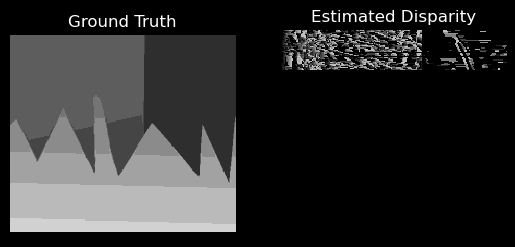

Procesing scanline  37
[[3.40643971e+00 5.64621275e+00 1.56637636e+01 ... 5.43348681e+03
  5.43555991e+03 5.43757746e+03]
 [           inf 8.42399053e+00 1.80526525e+01 ... 5.43415347e+03
  5.43622658e+03 5.43824413e+03]
 [           inf            inf 1.00526525e+01 ... 5.43359792e+03
  5.43611547e+03 5.43813302e+03]
 ...
 [           inf            inf            inf ... 5.43465347e+03
  5.43655991e+03 5.43879969e+03]
 [           inf            inf            inf ... 5.43532014e+03
  5.43739325e+03 5.43857746e+03]
 [           inf            inf            inf ... 5.43582014e+03
  5.43850436e+03 5.43907746e+03]]


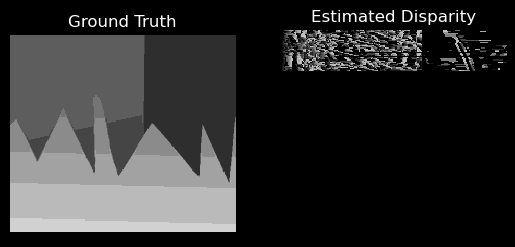

Procesing scanline  38
[[2.51755082e+00 5.92399053e+00 8.83043024e+00 ... 5.19904236e+03
  5.20128214e+03 5.20352191e+03]
 [           inf 6.03510164e+00 1.00526525e+01 ... 5.19932014e+03
  5.20122658e+03 5.20329969e+03]
 [           inf            inf 9.83043024e+00 ... 5.19915347e+03
  5.20139325e+03 5.20341080e+03]
 ...
 [           inf            inf            inf ... 5.20032014e+03
  5.20255991e+03 5.20641080e+03]
 [           inf            inf            inf ... 5.19865347e+03
  5.20267102e+03 5.20568858e+03]
 [           inf            inf            inf ... 5.19815347e+03
  5.20067102e+03 5.20541080e+03]]


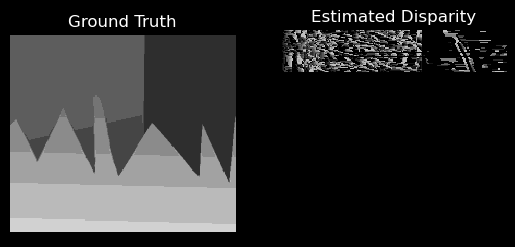

Procesing scanline  39
[[2.07310638e+00 7.64621275e+00 8.99709691e+00 ... 5.81020903e+03
  5.81244880e+03 5.81452191e+03]
 [           inf 5.09065720e+00 1.16082080e+01 ... 5.81104236e+03
  5.81328214e+03 5.81552191e+03]
 [           inf            inf 8.16376358e+00 ... 5.81098681e+03
  5.81305991e+03 5.81529969e+03]
 ...
 [           inf            inf            inf ... 5.81237570e+03
  5.81461547e+03 5.81685524e+03]
 [           inf            inf            inf ... 5.81237570e+03
  5.81461547e+03 5.81685524e+03]
 [           inf            inf            inf ... 5.81104236e+03
  5.81444880e+03 5.81685524e+03]]


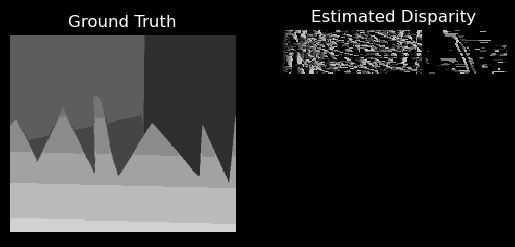

Procesing scanline  40
[[3.40643971e+00 6.31287942e+00 8.55265247e+00 ... 4.83148681e+03
  4.83350436e+03 4.83574413e+03]
 [           inf 7.81287942e+00 9.83043024e+00 ... 4.83104236e+03
  4.83311547e+03 4.83518858e+03]
 [           inf            inf 1.02193191e+01 ... 4.83109792e+03
  4.83317102e+03 4.83518858e+03]
 ...
 [           inf            inf            inf ... 4.83159792e+03
  4.83383769e+03 4.83607746e+03]
 [           inf            inf            inf ... 4.83182014e+03
  4.83367102e+03 4.83618858e+03]
 [           inf            inf            inf ... 4.83248681e+03
  4.83411547e+03 4.83635524e+03]]


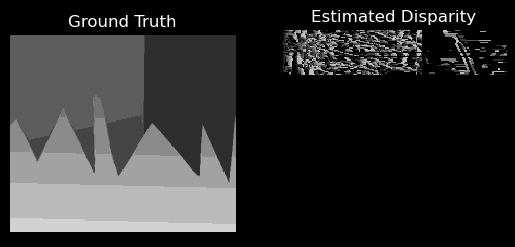

Procesing scanline  41
[[2.07310638e+00 4.14621275e+00 6.16376358e+00 ... 5.73637570e+03
  5.73861547e+03 5.74085524e+03]
 [           inf 5.14621275e+00 7.16376358e+00 ... 5.73654236e+03
  5.73861547e+03 5.74085524e+03]
 [           inf            inf 7.38598580e+00 ... 5.73676459e+03
  5.73928214e+03 5.74135524e+03]
 ...
 [           inf            inf            inf ... 5.74182014e+03
  5.74389325e+03 5.74213302e+03]
 [           inf            inf            inf ... 5.74004236e+03
  5.74294880e+03 5.74613302e+03]
 [           inf            inf            inf ... 5.74087570e+03
  5.74139325e+03 5.74518858e+03]]


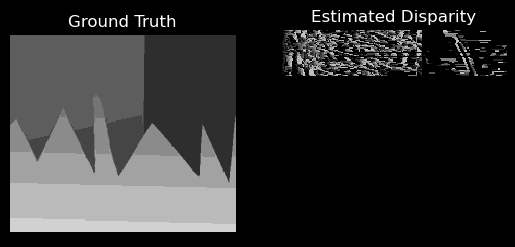

Procesing scanline  42
[[2.23977304e+00 4.47954609e+00 6.49709691e+00 ... 4.97237570e+03
  4.97444880e+03 4.97668858e+03]
 [           inf 5.47954609e+00 7.55265247e+00 ... 4.97337570e+03
  4.97539325e+03 4.97791080e+03]
 [           inf            inf 7.55265247e+00 ... 4.97343125e+03
  4.97539325e+03 4.97763302e+03]
 ...
 [           inf            inf            inf ... 4.97893125e+03
  4.97739325e+03 4.98685524e+03]
 [           inf            inf            inf ... 4.98587570e+03
  4.98094880e+03 4.98102191e+03]
 [           inf            inf            inf ... 4.98759792e+03
  4.98789325e+03 4.98546635e+03]]


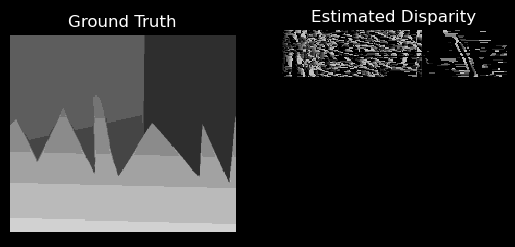

Procesing scanline  43
[[3.40643971e+00 5.42399053e+00 7.66376358e+00 ... 4.75582014e+03
  4.75833769e+03 4.76035524e+03]
 [           inf 7.31287942e+00 8.49709691e+00 ... 4.75726459e+03
  4.75889325e+03 4.76141080e+03]
 [           inf            inf 8.94154135e+00 ... 4.76126459e+03
  4.75933769e+03 4.76141080e+03]
 ...
 [           inf            inf            inf ... 4.76348681e+03
  4.76555991e+03 4.76335524e+03]
 [           inf            inf            inf ... 4.76765347e+03
  4.76555991e+03 4.76807746e+03]
 [           inf            inf            inf ... 4.76765347e+03
  4.76972658e+03 4.76807746e+03]]


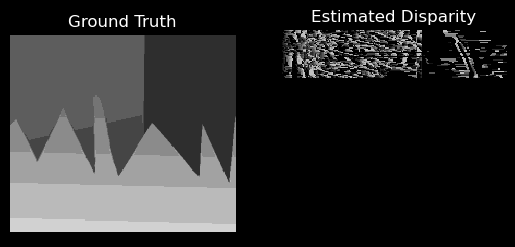

Procesing scanline  44
[[   7.57310638    9.81287942   12.33043024 ... 4302.76458515
  4305.00435819 4307.07746457]
 [          inf   13.31287942   13.71931913 ... 4305.82014071
  4306.67102486 4308.07746457]
 [          inf           inf   14.21931913 ... 4306.09791848
  4310.28213597 4308.52190902]
 ...
 [          inf           inf           inf ... 4310.26458515
  4318.28213597 4312.52190902]
 [          inf           inf           inf ... 4313.15347404
  4315.17102486 4318.91079791]
 [          inf           inf           inf ... 4306.76458515
  4318.28213597 4316.02190902]]


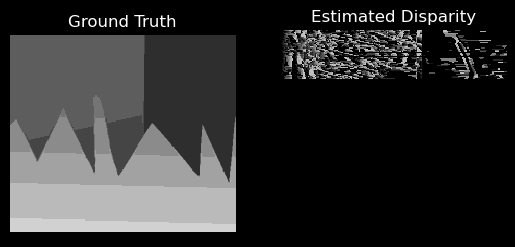

Procesing scanline  45
[[   7.57310638   10.0906572    15.66376358 ... 4727.04236293
  4729.05991375 4731.07746457]
 [          inf   11.97954609   16.66376358 ... 4728.54236293
  4730.11546931 4732.13302013]
 [          inf           inf   13.10820802 ... 4730.76458515
  4730.94880264 4732.07746457]
 ...
 [          inf           inf           inf ... 4733.59791848
  4736.78213597 4736.57746457]
 [          inf           inf           inf ... 4731.59791848
  4736.78213597 4737.63302013]
 [          inf           inf           inf ... 4731.09791848
  4734.55991375 4737.63302013]]


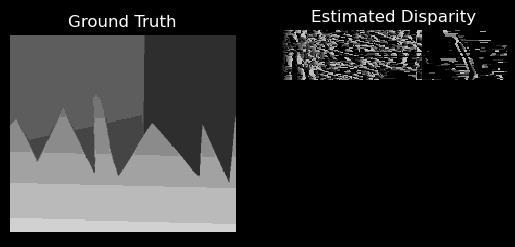

Procesing scanline  46
[[  18.07310638   23.64621275   27.05265247 ... 4055.93125182
  4058.44880264 4060.46635346]
 [          inf   35.31287942   26.66376358 ... 4056.65347404
  4059.17102486 4062.07746457]
 [          inf           inf   30.21931913 ... 4061.98680737
  4059.17102486 4062.07746457]
 ...
 [          inf           inf           inf ... 4059.98680737
  4062.50435819 4065.02190902]
 [          inf           inf           inf ... 4060.93125182
  4062.50435819 4064.18857568]
 [          inf           inf           inf ... 4060.93125182
  4063.44880264 4064.18857568]]


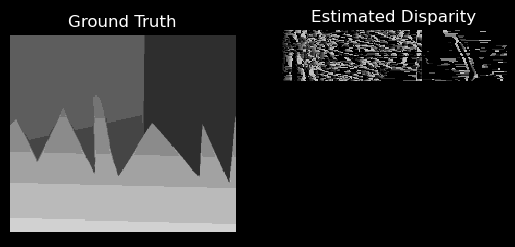

Procesing scanline  47
[[   7.57310638   11.5906572    18.10820802 ... 4357.04236293
  4359.11546931 4361.18857568]
 [          inf   16.14621275   14.60820802 ... 4358.93125182
  4360.55991375 4362.13302013]
 [          inf           inf   15.49709691 ... 4358.87569626
  4361.44880264 4363.02190902]
 ...
 [          inf           inf           inf ... 4358.43125182
  4360.55991375 4362.18857568]
 [          inf           inf           inf ... 4358.04236293
  4360.94880264 4362.35524235]
 [          inf           inf           inf ... 4357.65347404
  4360.17102486 4362.63302013]]


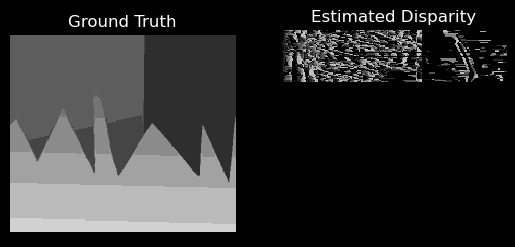

Procesing scanline  48
[[2.01755082e+00 4.25732387e+00 1.18304302e+01 ... 3.60748681e+03
  3.61000436e+03 3.61252191e+03]
 [           inf 5.25732387e+00 7.77487469e+00 ... 3.60965347e+03
  3.61022658e+03 3.61274413e+03]
 [           inf            inf 7.77487469e+00 ... 3.61059792e+03
  3.61139325e+03 3.61257746e+03]
 ...
 [           inf            inf            inf ... 3.60698681e+03
  3.60950436e+03 3.61174413e+03]
 [           inf            inf            inf ... 3.60759792e+03
  3.60983769e+03 3.61235524e+03]
 [           inf            inf            inf ... 3.60765347e+03
  3.61017102e+03 3.61241080e+03]]


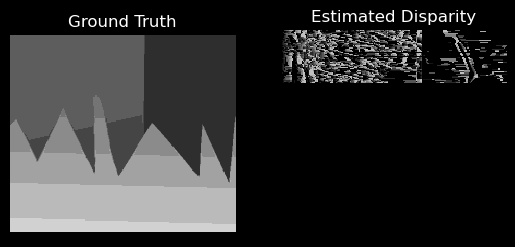

Procesing scanline  49
[[3.40643971e+00 1.09795461e+01 2.02193191e+01 ... 4.12948681e+03
  4.13150436e+03 4.13357746e+03]
 [           inf 7.81287942e+00 1.18304302e+01 ... 4.13104236e+03
  4.13255991e+03 4.13452191e+03]
 [           inf            inf 1.08859858e+01 ... 4.13020903e+03
  4.13272658e+03 4.13457746e+03]
 ...
 [           inf            inf            inf ... 4.12993125e+03
  4.13200436e+03 4.13424413e+03]
 [           inf            inf            inf ... 4.13004236e+03
  4.13211547e+03 4.13418858e+03]
 [           inf            inf            inf ... 4.13020903e+03
  4.13228214e+03 4.13435524e+03]]


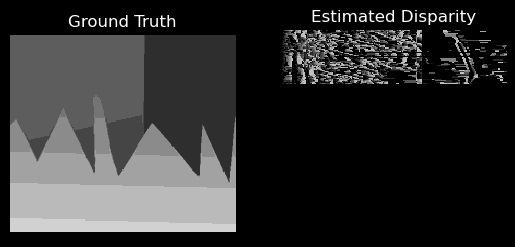

Procesing scanline  50
[[2.23977304e+00 7.81287942e+00 1.32748747e+01 ... 4.12443125e+03
  4.12667102e+03 4.12874413e+03]
 [           inf 5.75732387e+00 8.66376358e+00 ... 4.12515347e+03
  4.12717102e+03 4.12968858e+03]
 [           inf            inf 8.83043024e+00 ... 4.12632014e+03
  4.12767102e+03 4.12974413e+03]
 ...
 [           inf            inf            inf ... 4.12537570e+03
  4.12744880e+03 4.12968858e+03]
 [           inf            inf            inf ... 4.12554236e+03
  4.12767102e+03 4.12991080e+03]
 [           inf            inf            inf ... 4.12526459e+03
  4.12750436e+03 4.13002191e+03]]


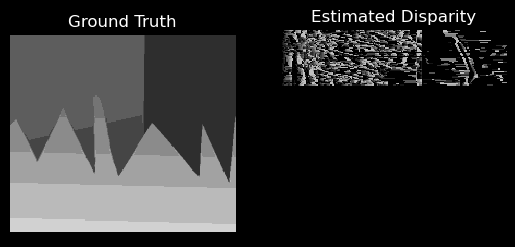

Procesing scanline  51
[[4.01755082e+00 7.42399053e+00 1.21637636e+01 ... 4.32820903e+03
  4.33017102e+03 4.33218858e+03]
 [           inf 9.03510164e+00 1.04415414e+01 ... 4.32715347e+03
  4.32967102e+03 4.33191080e+03]
 [           inf            inf 1.71637636e+01 ... 4.32837570e+03
  4.33039325e+03 4.33246635e+03]
 ...
 [           inf            inf            inf ... 4.32820903e+03
  4.33022658e+03 4.33229969e+03]
 [           inf            inf            inf ... 4.32837570e+03
  4.33022658e+03 4.33229969e+03]
 [           inf            inf            inf ... 4.32865347e+03
  4.33017102e+03 4.33224413e+03]]


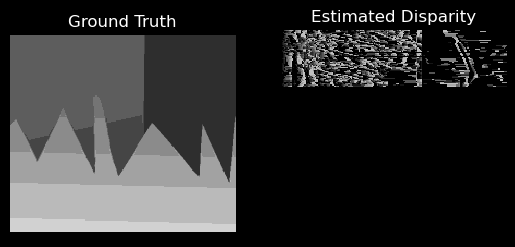

Procesing scanline  52
[[   6.51755082    8.5906572    18.60820802 ... 3400.76458515
  3403.00435819 3405.07746457]
 [          inf   16.25732387   11.83043024 ... 3400.65347404
  3402.72658042 3404.79968679]
 [          inf           inf   22.49709691 ... 3401.26458515
  3403.28213597 3405.52190902]
 ...
 [          inf           inf           inf ... 3402.26458515
  3404.00435819 3406.63302013]
 [          inf           inf           inf ... 3401.2090296
  3403.72658042 3406.63302013]
 [          inf           inf           inf ... 3401.15347404
  3403.17102486 3406.07746457]]


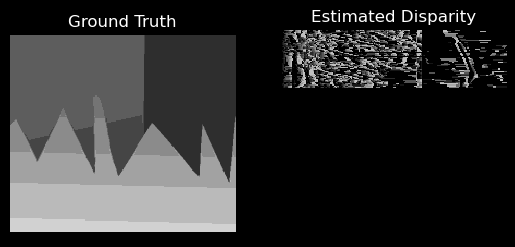

Procesing scanline  53
[[   6.51755082   10.53510164   28.60820802 ... 3090.48680737
  3092.55991375 3095.46635346]
 [          inf   15.0906572    17.10820802 ... 3090.93125182
  3093.83769153 3095.79968679]
 [          inf           inf   21.55265247 ... 3091.43125182
  3094.33769153 3096.96635346]
 ...
 [          inf           inf           inf ... 3091.93125182
  3094.39324708 3098.29968679]
 [          inf           inf           inf ... 3091.04236293
  3095.05991375 3096.96635346]
 [          inf           inf           inf ... 3090.98680737
  3093.89324708 3098.29968679]]


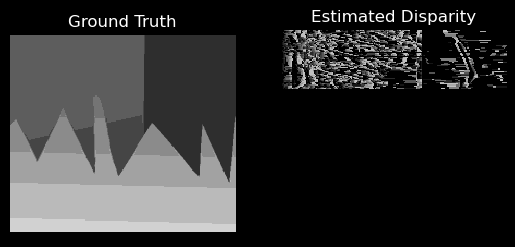

Procesing scanline  54
[[   4.73977304   19.25732387   12.16376358 ... 3489.93125182
  3492.83769153 3495.35524235]
 [          inf    8.25732387   19.66376358 ... 3490.26458515
  3493.67102486 3496.57746457]
 [          inf           inf   12.66376358 ... 3490.7090296
  3493.61546931 3497.02190902]
 ...
 [          inf           inf           inf ... 3491.54236293
  3497.44880264 3497.24413124]
 [          inf           inf           inf ... 3490.37569626
  3495.94880264 3500.35524235]
 [          inf           inf           inf ... 3490.65347404
  3492.89324708 3498.46635346]]


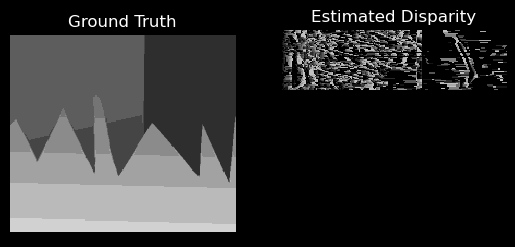

Procesing scanline  55
[[  12.90643971   15.42399053   17.44154135 ... 2962.15347404
  2964.17102486 2966.41079791]
 [          inf   16.81287942   18.49709691 ... 2962.65347404
  2964.72658042 2966.96635346]
 [          inf           inf   21.99709691 ... 2962.37569626
  2965.28213597 2967.68857568]
 ...
 [          inf           inf           inf ... 2961.65347404
  2965.67102486 2978.07746457]
 [          inf           inf           inf ... 2962.2090296
  2964.28213597 2969.85524235]
 [          inf           inf           inf ... 2962.37569626
  2964.39324708 2966.46635346]]


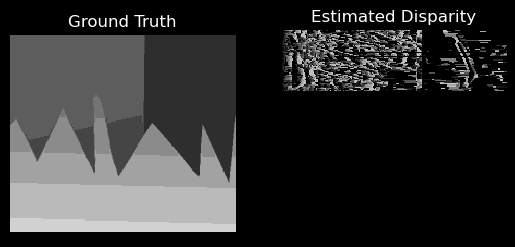

Procesing scanline  56
[[  14.51755082   20.0906572    26.16376358 ... 3428.15347404
  3430.44880264 3432.63302013]
 [          inf   17.5906572    19.66376358 ... 3428.15347404
  3430.17102486 3433.57746457]
 [          inf           inf   24.16376358 ... 3428.82014071
  3430.17102486 3433.07746457]
 ...
 [          inf           inf           inf ... 3426.93125182
  3429.44880264 3432.85524235]
 [          inf           inf           inf ... 3427.37569626
  3429.39324708 3431.46635346]
 [          inf           inf           inf ... 3428.15347404
  3430.17102486 3432.41079791]]


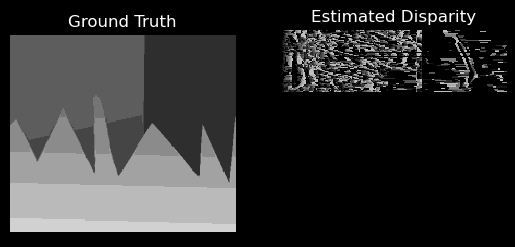

Procesing scanline  57
[[   8.73977304   16.31287942   15.77487469 ... 4619.7090296
  4621.72658042 4623.68857568]
 [          inf   12.25732387   17.83043024 ... 4620.54236293
  4621.89324708 4623.74413124]
 [          inf           inf   15.33043024 ... 4625.2090296
  4623.05991375 4623.91079791]
 ...
 [          inf           inf           inf ... 4619.65347404
  4621.89324708 4623.68857568]
 [          inf           inf           inf ... 4619.7090296
  4621.72658042 4623.91079791]
 [          inf           inf           inf ... 4618.65347404
  4620.67102486 4622.74413124]]


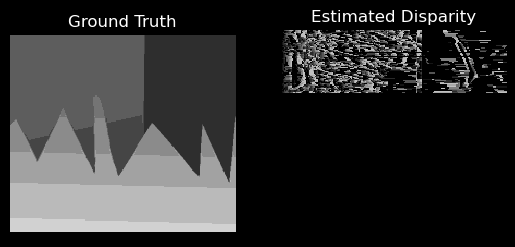

Procesing scanline  58
[[  12.90643971   15.42399053   17.66376358 ... 5654.65347404
  5656.61546931 5656.57746457]
 [          inf   16.42399053   20.44154135 ... 5653.54236293
  5658.61546931 5657.91079791]
 [          inf           inf   20.44154135 ... 5650.54236293
  5657.05991375 5659.24413124]
 ...
 [          inf           inf           inf ... 5651.54236293
  5655.78213597 5657.91079791]
 [          inf           inf           inf ... 5651.04236293
  5655.05991375 5657.41079791]
 [          inf           inf           inf ... 5650.09791848
  5653.50435819 5656.02190902]]


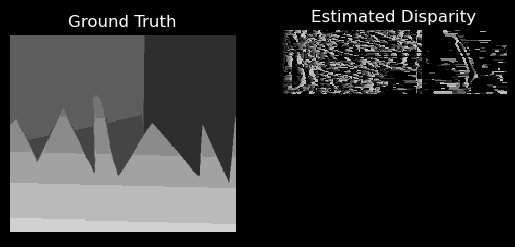

Procesing scanline  59
[[  26.51755082   28.53510164   39.94154135 ... 3176.65347404
  3179.17102486 3182.57746457]
 [          inf   32.25732387   32.05265247 ... 3176.2090296
  3178.44880264 3180.96635346]
 [          inf           inf   32.44154135 ... 3176.43125182
  3180.44880264 3181.68857568]
 ...
 [          inf           inf           inf ... 3176.15347404
  3181.72658042 3185.96635346]
 [          inf           inf           inf ... 3176.32014071
  3181.89324708 3185.02190902]
 [          inf           inf           inf ... 3176.76458515
  3181.50435819 3185.02190902]]


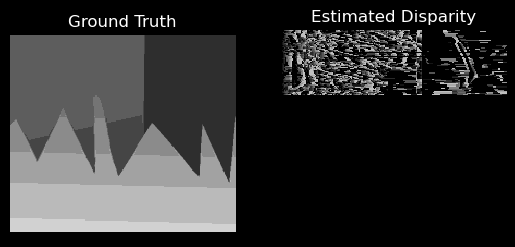

Procesing scanline  60
[[ 8.73977304 10.75732387 13.66376358 ...         inf         inf
          inf]
 [        inf 11.81287942 18.27487469 ...         inf         inf
          inf]
 [        inf         inf 19.33043024 ...         inf         inf
          inf]
 ...
 [        inf         inf         inf ...         inf         inf
          inf]
 [        inf         inf         inf ...         inf         inf
          inf]
 [        inf         inf         inf ...         inf         inf
          inf]]


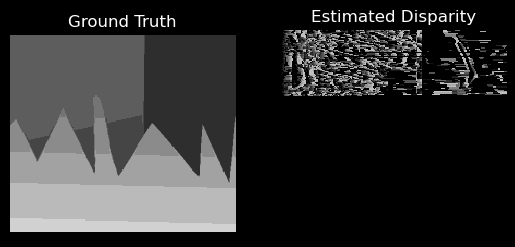

Procesing scanline  61
[[   7.57310638   12.31287942   17.8859858  ... 4736.09791848
  4739.50435819 4747.07746457]
 [          inf   11.97954609   20.71931913 ... 4736.7090296
  4740.11546931 4748.85524235]
 [          inf           inf   19.49709691 ... 4736.76458515
  4740.78213597 4749.24413124]
 ...
 [          inf           inf           inf ... 4740.43125182
  4745.83769153 4755.02190902]
 [          inf           inf           inf ... 4739.59791848
  4745.83769153 4758.57746457]
 [          inf           inf           inf ... 4738.2090296
  4744.67102486 4758.57746457]]


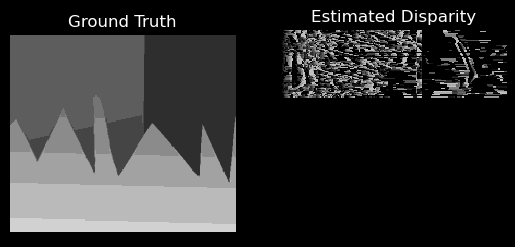

Procesing scanline  62
[[  20.01755082   30.03510164   54.27487469 ... 5304.15347404
  5306.22658042 5309.13302013]
 [          inf   32.42399053   57.55265247 ... 5304.59791848
  5306.83769153 5309.35524235]
 [          inf           inf   59.94154135 ... 5305.32014071
  5307.39324708 5310.13302013]
 ...
 [          inf           inf           inf ... 5304.87569626
  5308.89324708 5315.96635346]
 [          inf           inf           inf ... 5304.82014071
  5307.72658042 5312.79968679]
 [          inf           inf           inf ... 5304.7090296
  5308.11546931 5311.24413124]]


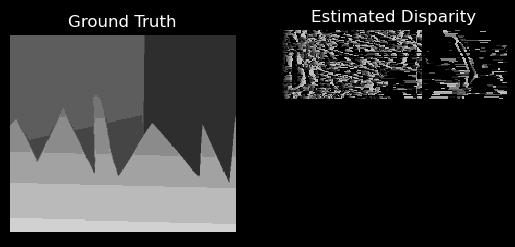

Procesing scanline  63
[[  12.90643971   27.42399053   27.66376358 ... 4634.7090296
  4636.72658042 4638.96635346]
 [          inf   22.64621275   34.05265247 ... 4635.54236293
  4636.94880264 4638.85524235]
 [          inf           inf   30.16376358 ... 4636.04236293
  4638.11546931 4639.29968679]
 ...
 [          inf           inf           inf ... 4633.76458515
  4636.00435819 4639.41079791]
 [          inf           inf           inf ... 4633.7090296
  4635.78213597 4638.29968679]
 [          inf           inf           inf ... 4633.82014071
  4636.05991375 4638.29968679]]


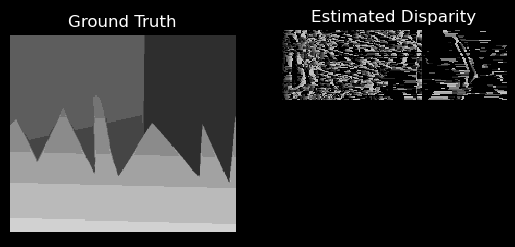

Procesing scanline  64
[[10.01755082 14.03510164 16.27487469 ...         inf         inf
          inf]
 [        inf 13.53510164 19.10820802 ...         inf         inf
          inf]
 [        inf         inf 17.94154135 ...         inf         inf
          inf]
 ...
 [        inf         inf         inf ...         inf         inf
          inf]
 [        inf         inf         inf ...         inf         inf
          inf]
 [        inf         inf         inf ...         inf         inf
          inf]]


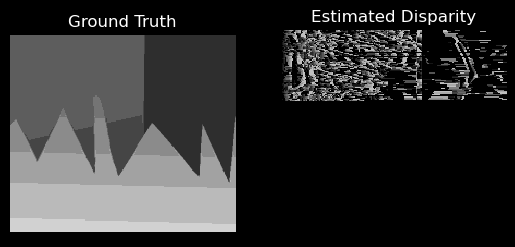

Procesing scanline  65
[[2.23977304e+00 4.47954609e+00 7.88598580e+00 ... 4.49182014e+03
  4.49389325e+03 4.49613302e+03]
 [           inf 5.47954609e+00 7.71931913e+00 ... 4.49287570e+03
  4.49483769e+03 4.49707746e+03]
 [           inf            inf 7.71931913e+00 ... 4.49265347e+03
  4.49489325e+03 4.49696635e+03]
 ...
 [           inf            inf            inf ... 4.49287570e+03
  4.49489325e+03 4.49696635e+03]
 [           inf            inf            inf ... 4.49287570e+03
  4.49505991e+03 4.49713302e+03]
 [           inf            inf            inf ... 4.49304236e+03
  4.49489325e+03 4.49741080e+03]]


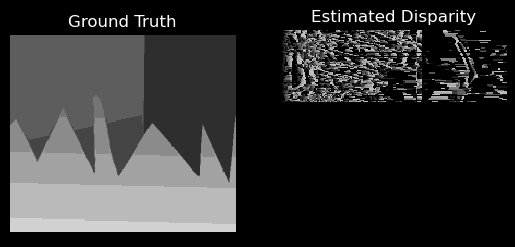

Procesing scanline  66
[[2.90643971e+00 5.14621275e+00 9.88598580e+00 ... 4.24965347e+03
  4.25167102e+03 4.25368858e+03]
 [           inf 1.04239905e+01 1.26637636e+01 ... 4.24948681e+03
  4.25150436e+03 4.25352191e+03]
 [           inf            inf 8.38598580e+00 ... 4.24915347e+03
  4.25139325e+03 4.25341080e+03]
 ...
 [           inf            inf            inf ... 4.24976459e+03
  4.25178214e+03 4.25385524e+03]
 [           inf            inf            inf ... 4.24982014e+03
  4.25189325e+03 4.25391080e+03]
 [           inf            inf            inf ... 4.25004236e+03
  4.25228214e+03 4.25435524e+03]]


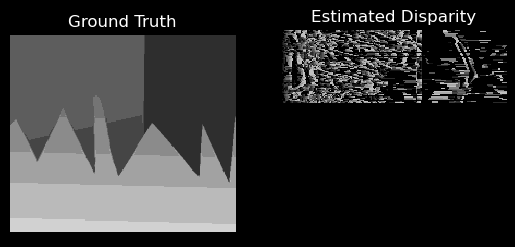

Procesing scanline  67
[[3.40643971e+00 6.81287942e+00 9.33043024e+00 ... 5.19432014e+03
  5.19655991e+03 5.19852191e+03]
 [           inf 7.81287942e+00 1.43304302e+01 ... 5.19487570e+03
  5.19644880e+03 5.19868858e+03]
 [           inf            inf 1.43304302e+01 ... 5.19459792e+03
  5.19694880e+03 5.19852191e+03]
 ...
 [           inf            inf            inf ... 5.19343125e+03
  5.19550436e+03 5.19757746e+03]
 [           inf            inf            inf ... 5.19387570e+03
  5.19589325e+03 5.19796635e+03]
 [           inf            inf            inf ... 5.19415347e+03
  5.19622658e+03 5.19824413e+03]]


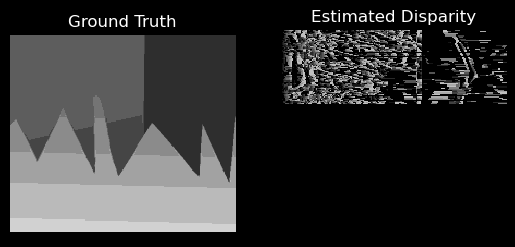

Procesing scanline  68
[[4.73977304e+00 1.03128794e+01 1.96637636e+01 ... 5.65343125e+03
  5.65550436e+03 5.65774413e+03]
 [           inf 8.64621275e+00 1.86637636e+01 ... 5.65459792e+03
  5.65650436e+03 5.65857746e+03]
 [           inf            inf 1.52193191e+01 ... 5.65432014e+03
  5.65655991e+03 5.65857746e+03]
 ...
 [           inf            inf            inf ... 5.65426459e+03
  5.65650436e+03 5.65857746e+03]
 [           inf            inf            inf ... 5.65443125e+03
  5.65650436e+03 5.65852191e+03]
 [           inf            inf            inf ... 5.65443125e+03
  5.65650436e+03 5.65857746e+03]]


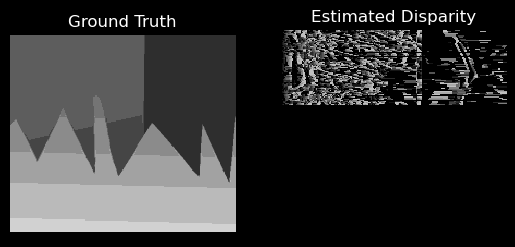

Procesing scanline  69
[[3.40643971e+00 9.92399053e+00 1.30526525e+01 ... 4.63193125e+03
  4.63483769e+03 4.63707746e+03]
 [           inf 6.47954609e+00 1.78859858e+01 ... 4.63320903e+03
  4.63544880e+03 4.63835524e+03]
 [           inf            inf 1.08859858e+01 ... 4.63293125e+03
  4.63583769e+03 4.63829969e+03]
 ...
 [           inf            inf            inf ... 4.63276459e+03
  4.63483769e+03 4.63691080e+03]
 [           inf            inf            inf ... 4.63276459e+03
  4.63478214e+03 4.63685524e+03]
 [           inf            inf            inf ... 4.63320903e+03
  4.63494880e+03 4.63696635e+03]]


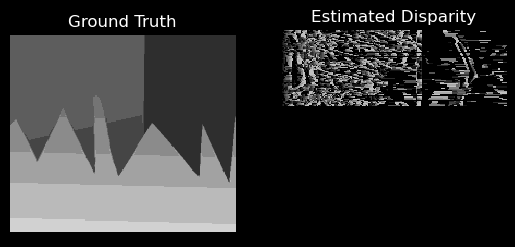

Procesing scanline  70
[[   7.57310638   12.31287942   14.33043024 ... 4105.2090296
  4107.44880264 4109.68857568]
 [          inf   14.14621275   16.21931913 ... 4105.98680737
  4108.05991375 4110.96635346]
 [          inf           inf   16.71931913 ... 4106.04236293
  4108.05991375 4110.57746457]
 ...
 [          inf           inf           inf ... 4106.37569626
  4108.44880264 4110.46635346]
 [          inf           inf           inf ... 4106.65347404
  4108.44880264 4110.46635346]
 [          inf           inf           inf ... 4108.87569626
  4108.72658042 4110.46635346]]


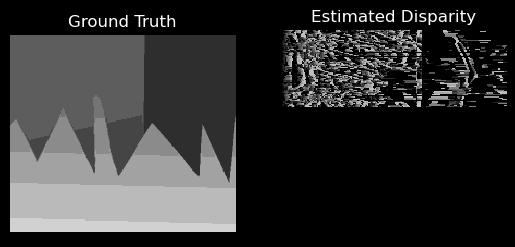

Procesing scanline  71
[[  14.51755082   21.03510164   23.94154135 ... 3758.43125182
  3760.67102486 3762.74413124]
 [          inf   26.92399053   27.60820802 ... 3759.65347404
  3761.67102486 3763.74413124]
 [          inf           inf   32.05265247 ... 3759.37569626
  3762.28213597 3763.74413124]
 ...
 [          inf           inf           inf ... 3760.26458515
  3761.50435819 3763.52190902]
 [          inf           inf           inf ... 3761.37569626
  3761.94880264 3763.91079791]
 [          inf           inf           inf ... 3762.09791848
  3762.83769153 3764.57746457]]


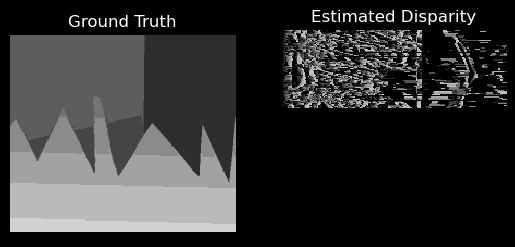

Procesing scanline  72
[[  34.01755082   39.5906572    41.60820802 ... 3788.37569626
  3790.44880264 3792.52190902]
 [          inf   66.42399053   43.49709691 ... 3789.48680737
  3791.44880264 3793.52190902]
 [          inf           inf   62.66376358 ... 3789.37569626
  3791.61546931 3793.52190902]
 ...
 [          inf           inf           inf ... 3792.04236293
  3792.78213597 3793.96635346]
 [          inf           inf           inf ... 3792.87569626
  3794.11546931 3794.85524235]
 [          inf           inf           inf ... 3793.82014071
  3794.94880264 3796.18857568]]


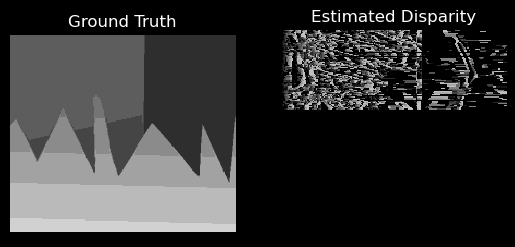

Procesing scanline  73
[[  39.57310638   46.0906572    50.83043024 ... 3562.2090296
  3564.22658042 3566.29968679]
 [          inf   74.5906572    49.16376358 ... 3563.15347404
  3565.17102486 3567.24413124]
 [          inf           inf   63.33043024 ... 3563.26458515
  3565.28213597 3567.29968679]
 ...
 [          inf           inf           inf ... 3567.7090296
  3567.94880264 3569.96635346]
 [          inf           inf           inf ... 3567.7090296
  3569.72658042 3569.24413124]
 [          inf           inf           inf ... 3567.7090296
  3569.72658042 3570.79968679]]


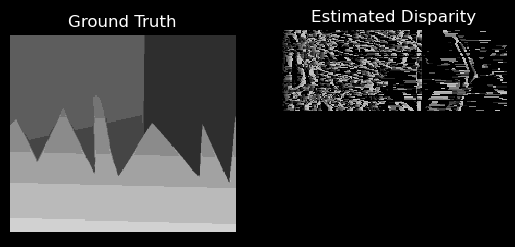

Procesing scanline  74
[[  36.73977304   42.31287942   49.8859858  ... 3150.87569626
  3154.28213597 3157.18857568]
 [          inf   64.25732387   45.3859858  ... 3151.87569626
  3155.89324708 3158.52190902]
 [          inf           inf   56.21931913 ... 3152.54236293
  3155.89324708 3159.13302013]
 ...
 [          inf           inf           inf ... 3158.09791848
  3155.89324708 3157.63302013]
 [          inf           inf           inf ... 3154.93125182
  3157.44880264 3159.13302013]
 [          inf           inf           inf ... 3154.93125182
  3155.28213597 3160.68857568]]


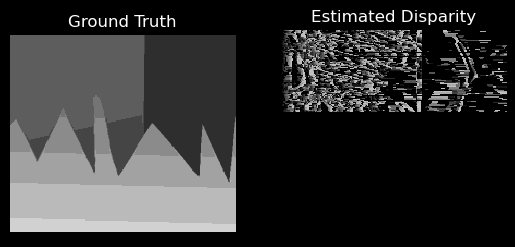

Procesing scanline  75
[[  55.40643971   65.42399053   72.99709691 ... 2978.98680737
  2981.22658042 2983.46635346]
 [          inf   93.14621275   69.33043024 ... 2980.43125182
  2982.22658042 2984.29968679]
 [          inf           inf   84.49709691 ... 2980.43125182
  2982.89324708 2984.29968679]
 ...
 [          inf           inf           inf ... 2986.65347404
  2991.39324708 2987.79968679]
 [          inf           inf           inf ... 2990.82014071
  2990.00435819 2989.79968679]
 [          inf           inf           inf ... 2990.82014071
  2994.50435819 2988.74413124]]


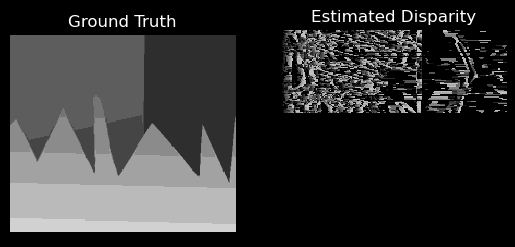

Procesing scanline  76
[[  28.90643971   43.42399053   52.16376358 ... 3026.93125182
  3029.00435819 3031.52190902]
 [          inf   49.92399053   47.83043024 ... 3027.93125182
  3030.44880264 3032.52190902]
 [          inf           inf   49.99709691 ... 3028.2090296
  3030.44880264 3033.41079791]
 ...
 [          inf           inf           inf ... 3034.43125182
  3035.50435819 3037.57746457]
 [          inf           inf           inf ... 3037.09791848
  3037.94880264 3040.02190902]
 [          inf           inf           inf ... 3038.59791848
  3040.83769153 3042.91079791]]


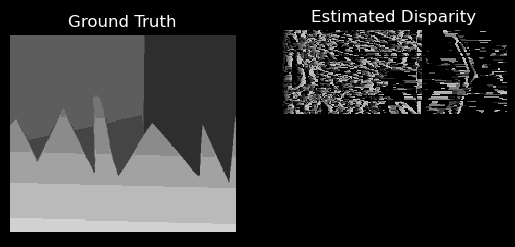

Procesing scanline  77
[[   7.57310638   31.81287942   19.66376358 ... 3311.32014071
  3313.83769153 3316.07746457]
 [          inf   16.14621275   29.05265247 ... 3312.32014071
  3314.83769153 3317.35524235]
 [          inf           inf   20.05265247 ... 3312.32014071
  3314.83769153 3317.35524235]
 ...
 [          inf           inf           inf ... 3317.82014071
  3318.83769153 3319.57746457]
 [          inf           inf           inf ... 3317.82014071
  3322.33769153 3321.35524235]
 [          inf           inf           inf ... 3317.82014071
  3322.33769153 3324.85524235]]


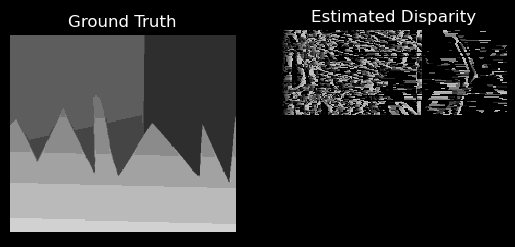

Procesing scanline  78
[[2.07310638e+00 1.08128794e+01 8.21931913e+00 ... 3.63698681e+03
  3.63905991e+03 3.64157746e+03]
 [           inf 5.14621275e+00 1.80526525e+01 ... 3.63765347e+03
  3.63989325e+03 3.64213302e+03]
 [           inf            inf 8.38598580e+00 ... 3.63754236e+03
  3.63961547e+03 3.64168858e+03]
 ...
 [           inf            inf            inf ... 3.63948681e+03
  3.64200436e+03 3.64407746e+03]
 [           inf            inf            inf ... 3.63948681e+03
  3.64272658e+03 3.64479969e+03]
 [           inf            inf            inf ... 3.64020903e+03
  3.64272658e+03 3.64563302e+03]]


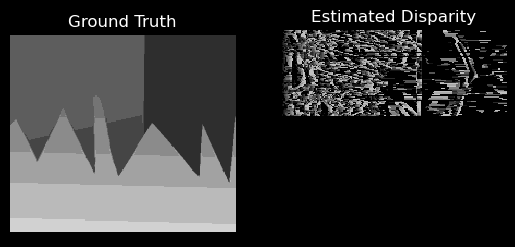

Procesing scanline  79
[[2.51755082e+00 5.03510164e+00 1.50526525e+01 ... 3.72076459e+03
  3.72283769e+03 3.72507746e+03]
 [           inf 6.03510164e+00 8.55265247e+00 ... 3.72204236e+03
  3.72383769e+03 3.72607746e+03]
 [           inf            inf 8.55265247e+00 ... 3.72243125e+03
  3.72400436e+03 3.72585524e+03]
 ...
 [           inf            inf            inf ... 3.72709792e+03
  3.72650436e+03 3.72635524e+03]
 [           inf            inf            inf ... 3.72509792e+03
  3.72828214e+03 3.72785524e+03]
 [           inf            inf            inf ... 3.72509792e+03
  3.72650436e+03 3.72941080e+03]]


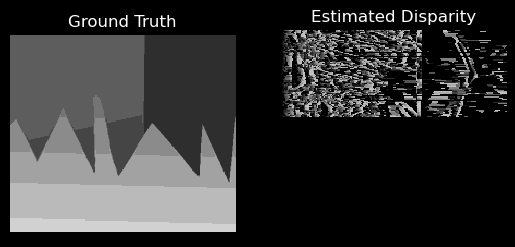

Procesing scanline  80
[[   4.01755082    6.25732387   17.66376358 ... 3289.7090296
  3292.61546931 3295.13302013]
 [          inf    7.0906572     9.60820802 ... 3290.7090296
  3294.11546931 3296.52190902]
 [          inf           inf    9.27487469 ... 3290.7090296
  3294.11546931 3297.02190902]
 ...
 [          inf           inf           inf ... 3292.2090296
  3297.22658042 3299.18857568]
 [          inf           inf           inf ... 3292.2090296
  3296.28213597 3300.13302013]
 [          inf           inf           inf ... 3292.2090296
  3296.28213597 3299.18857568]]


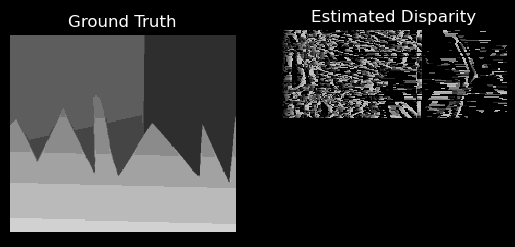

Procesing scanline  81
[[  14.51755082   17.03510164   21.05265247 ... 4247.15347404
  4249.39324708 4251.91079791]
 [          inf   21.0906572    21.44154135 ... 4248.15347404
  4250.39324708 4252.91079791]
 [          inf           inf   25.60820802 ... 4248.15347404
  4250.17102486 4252.68857568]
 ...
 [          inf           inf           inf ... 4248.98680737
  4250.67102486 4253.79968679]
 [          inf           inf           inf ... 4248.59791848
  4251.55991375 4253.29968679]
 [          inf           inf           inf ... 4248.32014071
  4251.05991375 4254.41079791]]


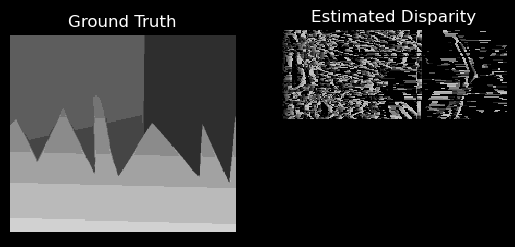

Procesing scanline  82
[[ 100.01755082  106.53510164  114.10820802 ... 5554.09791848
  5556.11546931 5558.35524235]
 [          inf  119.0906572   109.77487469 ... 5555.26458515
  5557.11546931 5559.18857568]
 [          inf           inf  111.55265247 ... 5555.2090296
  5557.17102486 5559.18857568]
 ...
 [          inf           inf           inf ... 5555.04236293
  5557.05991375 5559.13302013]
 [          inf           inf           inf ... 5555.04236293
  5557.05991375 5559.13302013]
 [          inf           inf           inf ... 5555.09791848
  5557.11546931 5559.18857568]]


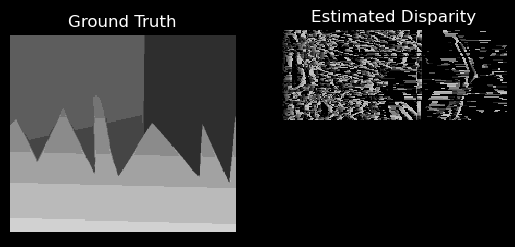

Procesing scanline  83
[[ 124.73977304  148.97954609  167.05265247 ... 5088.37569626
  5090.44880264 5092.46635346]
 [          inf  149.97954609  152.21931913 ... 5089.32014071
  5091.33769153 5093.57746457]
 [          inf           inf  152.21931913 ... 5089.54236293
  5091.44880264 5093.52190902]
 ...
 [          inf           inf           inf ... 5090.2090296
  5092.78213597 5094.85524235]
 [          inf           inf           inf ... 5089.82014071
  5092.78213597 5094.35524235]
 [          inf           inf           inf ... 5089.82014071
  5092.28213597 5094.35524235]]


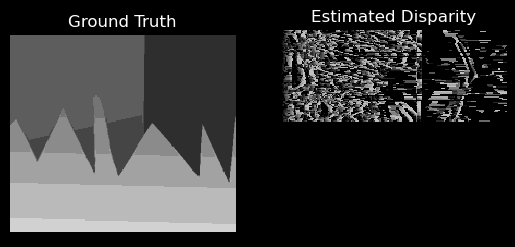

Procesing scanline  84
[[  74.01755082  129.42399053  148.05265247 ... 5389.32014071
  5391.55991375 5393.63302013]
 [          inf  127.03510164  131.77487469 ... 5390.76458515
  5392.33769153 5394.41079791]
 [          inf           inf  133.60820802 ... 5391.65347404
  5392.55991375 5394.63302013]
 ...
 [          inf           inf           inf ... 5392.26458515
  5393.72658042 5396.57746457]
 [          inf           inf           inf ... 5391.15347404
  5393.72658042 5396.57746457]
 [          inf           inf           inf ... 5391.65347404
  5392.83769153 5396.57746457]]


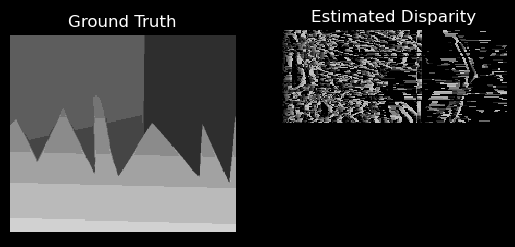

Procesing scanline  85
[[  58.90643971   66.47954609  152.99709691 ... 5254.09791848
  5256.11546931 5258.18857568]
 [          inf  111.92399053   89.55265247 ... 5254.76458515
  5257.00435819 5259.02190902]
 [          inf           inf   69.55265247 ... 5254.87569626
  5257.33769153 5259.35524235]
 ...
 [          inf           inf           inf ... 5253.82014071
  5256.33769153 5258.85524235]
 [          inf           inf           inf ... 5254.59791848
  5256.67102486 5259.18857568]
 [          inf           inf           inf ... 5254.59791848
  5256.83769153 5258.91079791]]


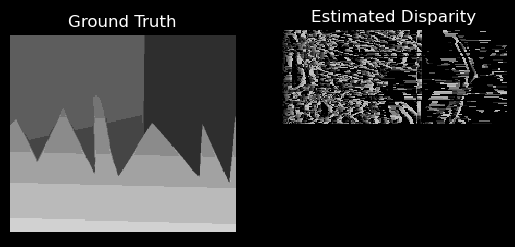

Procesing scanline  86
[[2.07310638e+00 1.32090657e+02 1.50385986e+02 ... 4.77770903e+03
  4.77994880e+03 4.78202191e+03]
 [           inf 3.98128794e+01 1.17885986e+02 ... 4.77782014e+03
  4.78033769e+03 4.78235524e+03]
 [           inf            inf 5.37193191e+01 ... 4.77776459e+03
  4.78028214e+03 4.78235524e+03]
 ...
 [           inf            inf            inf ... 4.77870903e+03
  4.78111547e+03 4.78296635e+03]
 [           inf            inf            inf ... 4.77898681e+03
  4.78111547e+03 4.78302191e+03]
 [           inf            inf            inf ... 4.77870903e+03
  4.78150436e+03 4.78302191e+03]]


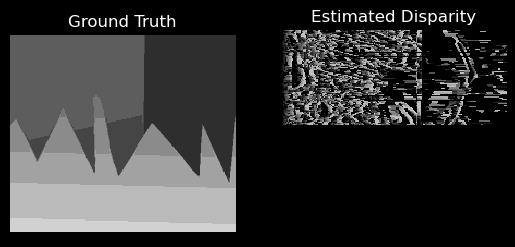

Procesing scanline  87
[[ 366.51755082  491.25732387  512.83043024 ... 6236.37569626
  6238.89324708 6242.29968679]
 [          inf  445.5906572   515.66376358 ... 6237.37569626
  6239.89324708 6243.29968679]
 [          inf           inf  483.33043024 ... 6237.82014071
  6239.89324708 6243.29968679]
 ...
 [          inf           inf           inf ... 6237.82014071
  6240.78213597 6245.46635346]
 [          inf           inf           inf ... 6238.2090296
  6240.78213597 6244.63302013]
 [          inf           inf           inf ... 6237.82014071
  6241.39324708 6244.63302013]]


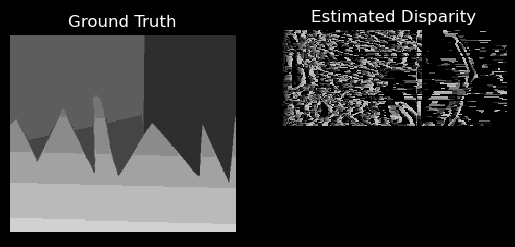

Procesing scanline  88
[[ 394.01755082  498.75732387  570.05265247 ... 6399.2090296
  6401.44880264 6403.96635346]
 [          inf  469.03510164  588.60820802 ... 6400.65347404
  6402.44880264 6404.96635346]
 [          inf           inf  556.55265247 ... 6400.65347404
  6403.11546931 6404.96635346]
 ...
 [          inf           inf           inf ... 6401.04236293
  6403.61546931 6407.18857568]
 [          inf           inf           inf ... 6401.54236293
  6403.61546931 6406.46635346]
 [          inf           inf           inf ... 6401.04236293
  6404.22658042 6406.46635346]]


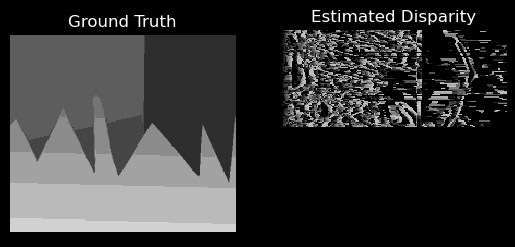

Procesing scanline  89
[[114.51755082 344.0906572  341.27487469 ...          inf          inf
           inf]
 [         inf 338.03510164 346.77487469 ...          inf          inf
           inf]
 [         inf          inf 346.60820802 ...          inf          inf
           inf]
 ...
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]]


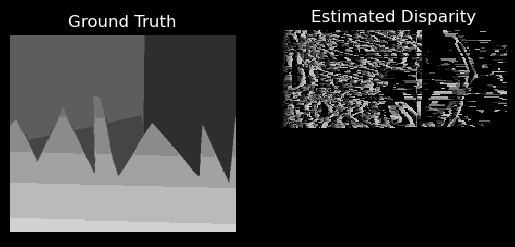

Procesing scanline  90
[[  5.57310638 181.81287942 186.55265247 ...          inf          inf
           inf]
 [         inf 265.47954609 184.8859858  ...          inf          inf
           inf]
 [         inf          inf 191.55265247 ...          inf          inf
           inf]
 ...
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]]


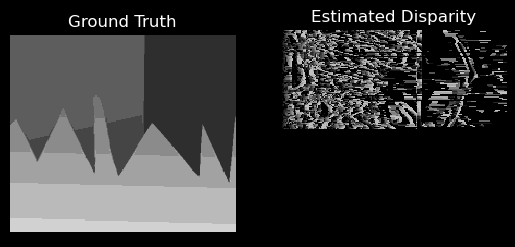

Procesing scanline  91
[[6.51755082e+00 7.27573239e+01 8.70526525e+01 ... 6.55820903e+03
  6.56044880e+03 6.56268858e+03]
 [           inf 5.95351016e+01 2.23552652e+02 ... 6.55920903e+03
  6.56128214e+03 6.56352191e+03]
 [           inf            inf 2.01441541e+02 ... 6.55926459e+03
  6.56144880e+03 6.56352191e+03]
 ...
 [           inf            inf            inf ... 6.55970903e+03
  6.56172658e+03 6.56368858e+03]
 [           inf            inf            inf ... 6.55970903e+03
  6.56211547e+03 6.56396635e+03]
 [           inf            inf            inf ... 6.55970903e+03
  6.56211547e+03 6.56435524e+03]]


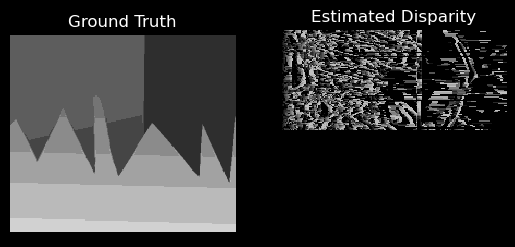

Procesing scanline  92
[[  62.51755082   65.03510164   71.55265247 ... 6751.65347404
  6753.67102486 6755.68857568]
 [          inf  118.92399053  310.05265247 ... 6751.98680737
  6754.05991375 6756.13302013]
 [          inf           inf  558.94154135 ... 6752.59791848
  6754.61546931 6756.85524235]
 ...
 [          inf           inf           inf ... 6753.09791848
  6754.72658042 6756.91079791]
 [          inf           inf           inf ... 6753.09791848
  6755.17102486 6756.91079791]
 [          inf           inf           inf ... 6752.65347404
  6755.17102486 6757.57746457]]


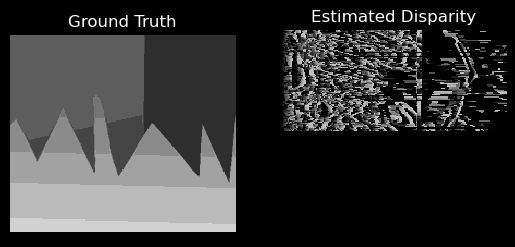

Procesing scanline  93
[[2.07310638e+00 1.37479546e+02 1.82385986e+02 ... 6.88887570e+03
  6.89139325e+03 6.89363302e+03]
 [           inf 5.14621275e+00 5.71637636e+01 ... 6.89037570e+03
  6.89211547e+03 6.89502191e+03]
 [           inf            inf 3.03859858e+01 ... 6.89037570e+03
  6.89278214e+03 6.89491080e+03]
 ...
 [           inf            inf            inf ... 6.89037570e+03
  6.89239325e+03 6.89579969e+03]
 [           inf            inf            inf ... 6.88970903e+03
  6.89261547e+03 6.89529969e+03]
 [           inf            inf            inf ... 6.89015347e+03
  6.89194880e+03 6.89535524e+03]]


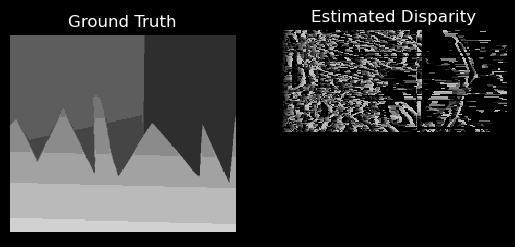

Procesing scanline  94
[[ 55.40643971 146.31287942 213.55265247 ...          inf          inf
           inf]
 [         inf 134.47954609 196.99709691 ...          inf          inf
           inf]
 [         inf          inf 245.05265247 ...          inf          inf
           inf]
 ...
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]]


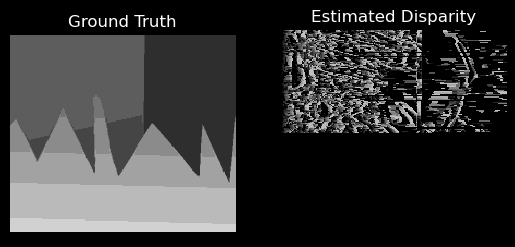

Procesing scanline  95
[[164.01755082 246.25732387 282.99709691 ...          inf          inf
           inf]
 [         inf 295.03510164 347.27487469 ...          inf          inf
           inf]
 [         inf          inf 399.49709691 ...          inf          inf
           inf]
 ...
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]]


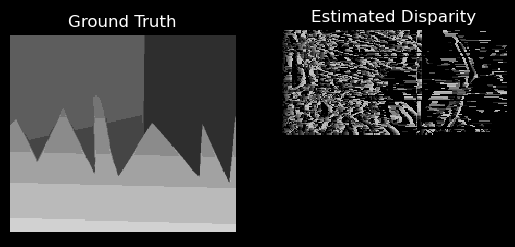

Procesing scanline  96
[[ 66.23977304 100.25732387 103.16376358 ...          inf          inf
           inf]
 [         inf 133.47954609 135.27487469 ...          inf          inf
           inf]
 [         inf          inf 167.49709691 ...          inf          inf
           inf]
 ...
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]]


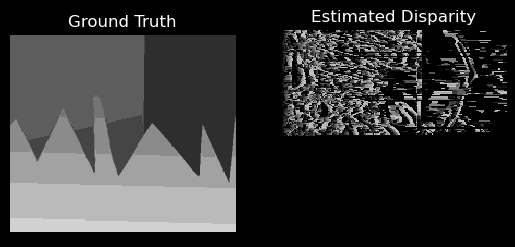

Procesing scanline  97
[[  10.01755082   16.53510164   19.05265247 ... 8621.26458515
  8623.33769153 8625.41079791]
 [          inf   23.92399053   19.77487469 ... 8626.26458515
  8624.78213597 8626.35524235]
 [          inf           inf   22.27487469 ... 8631.15347404
  8628.78213597 8626.57746457]
 ...
 [          inf           inf           inf ... 9211.15347404
  8859.00435819 8698.35524235]
 [          inf           inf           inf ...           inf
  9213.67102486 8853.91079791]
 [          inf           inf           inf ...           inf
            inf 9204.35524235]]


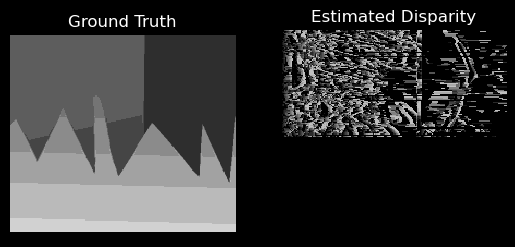

Procesing scanline  98
[[4.01755082e+00 6.09065720e+00 1.89970969e+01 ... 8.55415347e+03
  8.55889325e+03 8.56113302e+03]
 [           inf 7.09065720e+00 2.33304302e+01 ... 8.56448681e+03
  8.56389325e+03 8.56546635e+03]
 [           inf            inf 2.33304302e+01 ... 8.58315347e+03
  8.57322658e+03 8.56991080e+03]
 ...
 [           inf            inf            inf ...            inf
             inf 9.03213302e+03]
 [           inf            inf            inf ...            inf
             inf            inf]
 [           inf            inf            inf ...            inf
             inf            inf]]


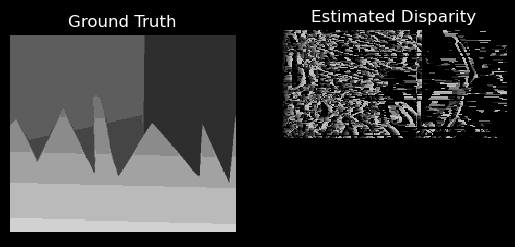

Procesing scanline  99
[[2.07310638e+00 1.34795461e+01 2.15526525e+01 ... 7.65898681e+03
  7.66455991e+03 7.67107746e+03]
 [           inf 1.18128794e+01 1.73859858e+01 ... 7.68137570e+03
  7.67450436e+03 7.67696635e+03]
 [           inf            inf 1.68304302e+01 ... 7.75470903e+03
  7.69955991e+03 7.68979969e+03]
 ...
 [           inf            inf            inf ...            inf
             inf            inf]
 [           inf            inf            inf ...            inf
             inf            inf]
 [           inf            inf            inf ...            inf
             inf            inf]]


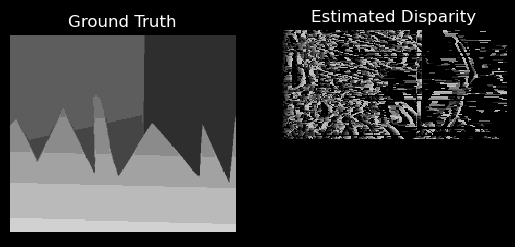

Procesing scanline  100
[[5.57310638e+00 1.11462128e+01 1.41082080e+01 ... 6.90226459e+03
  6.92033769e+03 6.92791080e+03]
 [           inf 9.09065720e+00 1.19970969e+01 ... 7.04637570e+03
  6.98550436e+03 6.94785524e+03]
 [           inf            inf 1.66082080e+01 ... 7.27659792e+03
  7.14728214e+03 7.02135524e+03]
 ...
 [           inf            inf            inf ... 7.55576459e+03
             inf            inf]
 [           inf            inf            inf ... 7.54326459e+03
             inf            inf]
 [           inf            inf            inf ... 7.49437570e+03
             inf            inf]]


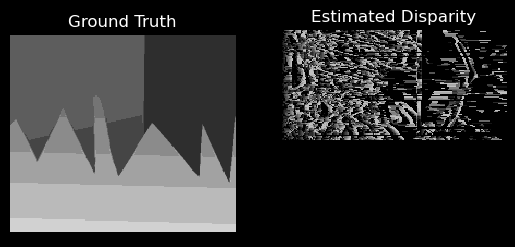

Procesing scanline  101
[[2.07310638e+00 9.64621275e+00 3.85526525e+01 ... 6.94215347e+03
  7.01617102e+03 7.05291080e+03]
 [           inf 9.59065720e+00 2.96082080e+01 ... 7.09598681e+03
  7.18717102e+03 7.13674413e+03]
 [           inf            inf 2.86637636e+01 ... 7.15782014e+03
  7.36567102e+03 7.34007746e+03]
 ...
 [           inf            inf            inf ... 7.22509792e+03
  7.53455991e+03 7.71607746e+03]
 [           inf            inf            inf ... 7.18598681e+03
  7.51189325e+03 7.72857746e+03]
 [           inf            inf            inf ... 7.19559792e+03
  7.46789325e+03 7.70368858e+03]]


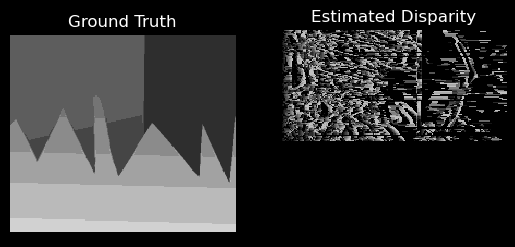

Procesing scanline  102
[[11.40643971 48.14621275 31.33043024 ...         inf         inf
          inf]
 [        inf 26.92399053 30.94154135 ...         inf         inf
          inf]
 [        inf         inf 30.83043024 ...         inf         inf
          inf]
 ...
 [        inf         inf         inf ...         inf         inf
          inf]
 [        inf         inf         inf ...         inf         inf
          inf]
 [        inf         inf         inf ...         inf         inf
          inf]]


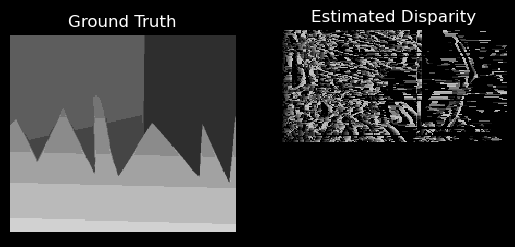

Procesing scanline  103
[[  48.73977304   70.81287942   79.8859858  ... 7499.54236293
  7573.55991375 7714.46635346]
 [          inf   65.97954609   84.05265247 ... 7506.32014071
  7582.78213597 7744.63302013]
 [          inf           inf   79.8859858  ... 7523.2090296
  7600.55991375 7757.07746457]
 ...
 [          inf           inf           inf ... 7565.82014071
  7709.28213597 7941.07746457]
 [          inf           inf           inf ... 7569.87569626
  7723.05991375 7932.13302013]
 [          inf           inf           inf ... 7565.82014071
  7730.11546931 7950.13302013]]


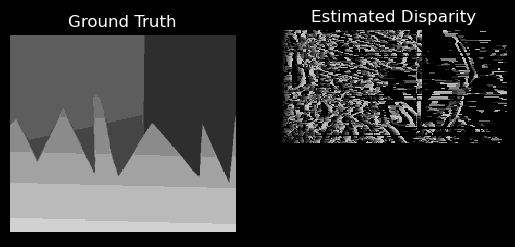

Procesing scanline  104
[[ 12.90643971  22.92399053 169.44154135 ...          inf          inf
           inf]
 [         inf  23.92399053 170.44154135 ...          inf          inf
           inf]
 [         inf          inf 170.44154135 ...          inf          inf
           inf]
 ...
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]]


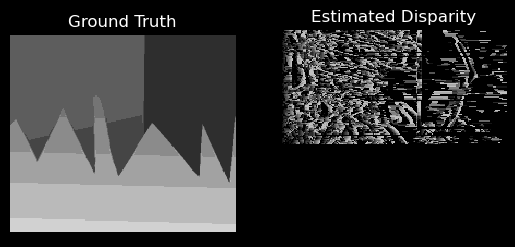

Procesing scanline  105
[[  82.23977304  223.14621275  497.3859858  ... 8953.98680737
  8948.94880264 8956.52190902]
 [          inf  235.47954609  475.55265247 ... 8952.7090296
  8951.61546931 8952.02190902]
 [          inf           inf  490.66376358 ... 8947.37569626
  8950.89324708 8954.68857568]
 ...
 [          inf           inf           inf ... 9026.2090296
  8964.94880264 8952.85524235]
 [          inf           inf           inf ... 9014.04236293
  9009.39324708 8968.02190902]
 [          inf           inf           inf ... 8989.54236293
  8998.89324708 9012.46635346]]


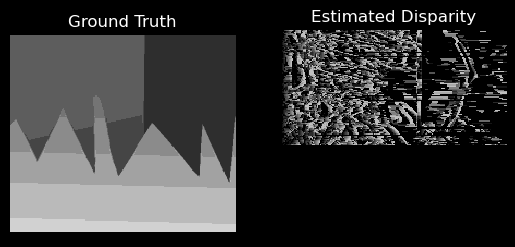

Procesing scanline  106
[[  109.57310638   399.5906572    551.83043024 ... 10145.93125182
  10141.67102486 10178.02190902]
 [           inf   400.5906572    541.49709691 ... 10169.59791848
  10140.78213597 10147.29968679]
 [           inf            inf   541.49709691 ... 10150.09791848
  10147.50435819 10144.68857568]
 ...
 [           inf            inf            inf ... 10223.76458515
  10160.83769153 10148.85524235]
 [           inf            inf            inf ... 10151.09791848
  10178.33769153 10154.18857568]
 [           inf            inf            inf ... 10137.76458515
  10140.28213597 10166.79968679]]


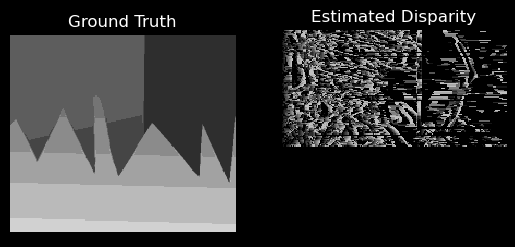

Procesing scanline  107
[[135.40643971 372.14621275 446.44154135 ...          inf          inf
           inf]
 [         inf 358.92399053 449.83043024 ...          inf          inf
           inf]
 [         inf          inf 442.16376358 ...          inf          inf
           inf]
 ...
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]]


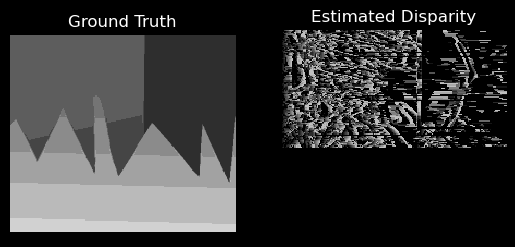

Procesing scanline  108
[[146.51755082 261.03510164 348.99709691 ...          inf          inf
           inf]
 [         inf 257.0906572  323.33043024 ...          inf          inf
           inf]
 [         inf          inf 320.60820802 ...          inf          inf
           inf]
 ...
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]]


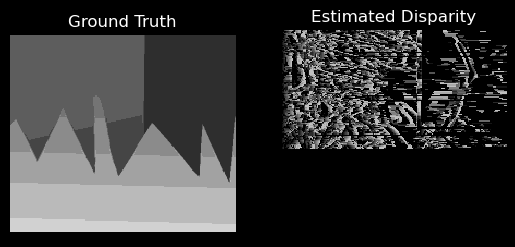

Procesing scanline  109
[[422.51755082 580.5906572  620.16376358 ...          inf          inf
           inf]
 [         inf 660.25732387 676.99709691 ...          inf          inf
           inf]
 [         inf          inf 739.66376358 ...          inf          inf
           inf]
 ...
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]]


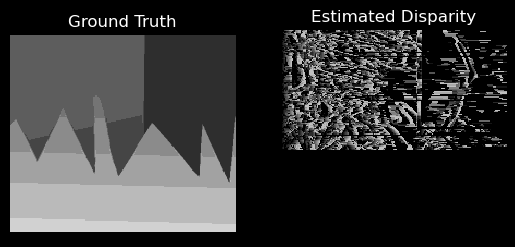

Procesing scanline  110
[[384.73977304 536.97954609 651.49709691 ...          inf          inf
           inf]
 [         inf 568.25732387 662.71931913 ...          inf          inf
           inf]
 [         inf          inf 690.21931913 ...          inf          inf
           inf]
 ...
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]]


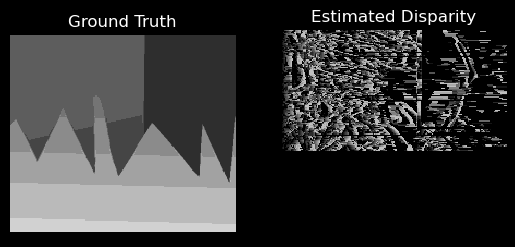

Procesing scanline  111
[[282.07310638 446.0906572  502.55265247 ...          inf          inf
           inf]
 [         inf 435.31287942 501.55265247 ...          inf          inf
           inf]
 [         inf          inf 495.21931913 ...          inf          inf
           inf]
 ...
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]]


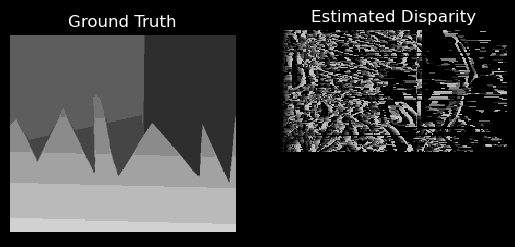

Procesing scanline  112
[[314.51755082 516.53510164 545.44154135 ...          inf          inf
           inf]
 [         inf 574.42399053 539.60820802 ...          inf          inf
           inf]
 [         inf          inf 560.05265247 ...          inf          inf
           inf]
 ...
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]]


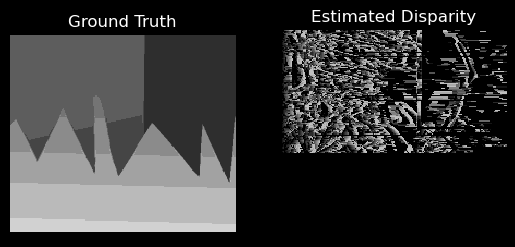

Procesing scanline  113
[[170.07310638 206.81287942 240.83043024 ...          inf          inf
           inf]
 [         inf 226.47954609 256.55265247 ...          inf          inf
           inf]
 [         inf          inf 277.8859858  ...          inf          inf
           inf]
 ...
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]]


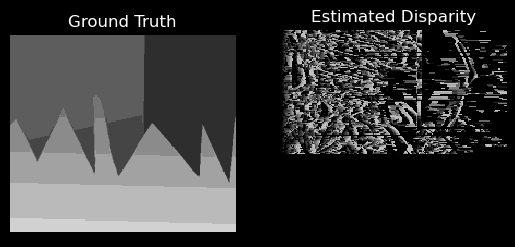

Procesing scanline  114
[[10.01755082 32.0906572  87.49709691 ...         inf         inf
          inf]
 [        inf 35.25732387 75.60820802 ...         inf         inf
          inf]
 [        inf         inf 78.66376358 ...         inf         inf
          inf]
 ...
 [        inf         inf         inf ...         inf         inf
          inf]
 [        inf         inf         inf ...         inf         inf
          inf]
 [        inf         inf         inf ...         inf         inf
          inf]]


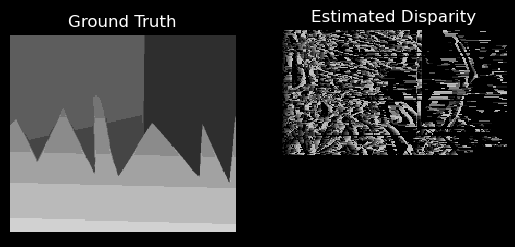

Procesing scanline  115
[[ 36.73977304  70.75732387 122.77487469 ...          inf          inf
           inf]
 [         inf  86.47954609 134.27487469 ...          inf          inf
           inf]
 [         inf          inf 153.99709691 ...          inf          inf
           inf]
 ...
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]]


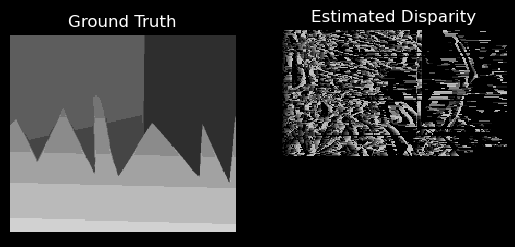

Procesing scanline  116
[[39.57310638 68.47954609 78.49709691 ...         inf         inf
          inf]
 [        inf 83.0906572  87.55265247 ...         inf         inf
          inf]
 [        inf         inf 98.3859858  ...         inf         inf
          inf]
 ...
 [        inf         inf         inf ...         inf         inf
          inf]
 [        inf         inf         inf ...         inf         inf
          inf]
 [        inf         inf         inf ...         inf         inf
          inf]]


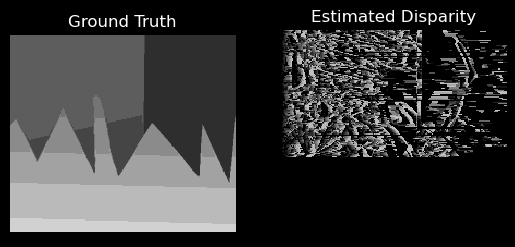

Procesing scanline  117
[[ 6.51755082 14.0906572  59.66376358 ...         inf         inf
          inf]
 [        inf 29.5906572  51.83043024 ...         inf         inf
          inf]
 [        inf         inf 81.33043024 ...         inf         inf
          inf]
 ...
 [        inf         inf         inf ...         inf         inf
          inf]
 [        inf         inf         inf ...         inf         inf
          inf]
 [        inf         inf         inf ...         inf         inf
          inf]]


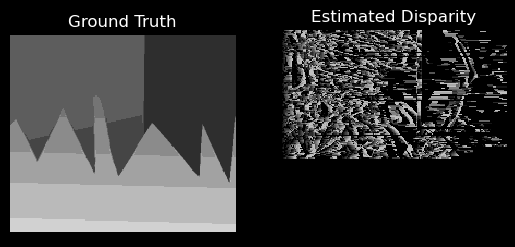

Procesing scanline  118
[[14.51755082 34.53510164 31.94154135 ...         inf         inf
          inf]
 [        inf 28.42399053 50.49709691 ...         inf         inf
          inf]
 [        inf         inf 43.94154135 ...         inf         inf
          inf]
 ...
 [        inf         inf         inf ...         inf         inf
          inf]
 [        inf         inf         inf ...         inf         inf
          inf]
 [        inf         inf         inf ...         inf         inf
          inf]]


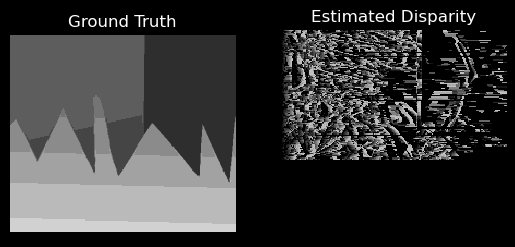

Procesing scanline  119
[[3.40643971e+00 5.54239905e+01 1.25441541e+02 ... 1.31987646e+04
  1.32021710e+04            inf]
 [           inf 2.44239905e+01 1.24441541e+02 ... 1.31999868e+04
  1.32026710e+04            inf]
 [           inf            inf 7.74415414e+01 ... 1.32000424e+04
  1.32022821e+04            inf]
 ...
 [           inf            inf            inf ... 1.38595979e+04
  1.38740044e+04 1.33493552e+04]
 [           inf            inf            inf ... 1.37775424e+04
  1.37911710e+04 1.32548552e+04]
 [           inf            inf            inf ... 1.37662646e+04
  1.37137821e+04 1.32809108e+04]]


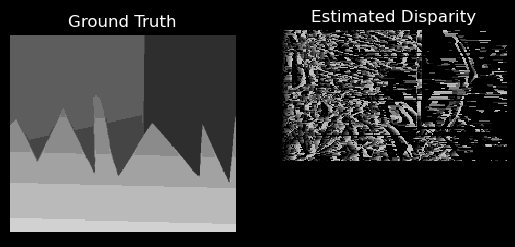

Procesing scanline  120
[[100.01755082 174.03510164 202.94154135 ...          inf          inf
           inf]
 [         inf 183.25732387 245.10820802 ...          inf          inf
           inf]
 [         inf          inf 253.10820802 ...          inf          inf
           inf]
 ...
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]]


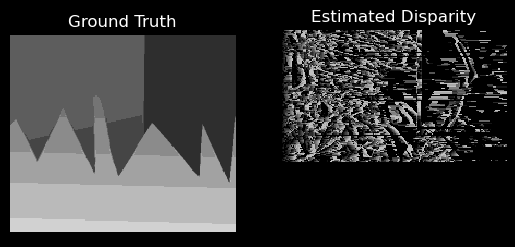

Procesing scanline  121
[[ 7.57310638 17.5906572  20.49709691 ...         inf         inf
          inf]
 [        inf 17.31287942 20.71931913 ...         inf         inf
          inf]
 [        inf         inf 21.21931913 ...         inf         inf
          inf]
 ...
 [        inf         inf         inf ...         inf         inf
          inf]
 [        inf         inf         inf ...         inf         inf
          inf]
 [        inf         inf         inf ...         inf         inf
          inf]]


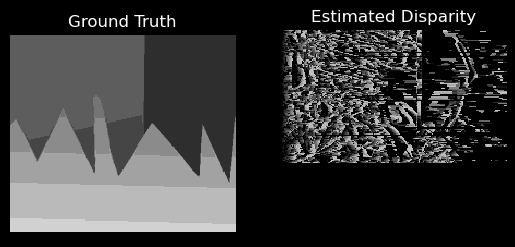

Procesing scanline  122
[[ 6.51755082 22.75732387 62.33043024 ...         inf         inf
          inf]
 [        inf 22.03510164 33.44154135 ...         inf         inf
          inf]
 [        inf         inf 33.05265247 ...         inf         inf
          inf]
 ...
 [        inf         inf         inf ...         inf         inf
          inf]
 [        inf         inf         inf ...         inf         inf
          inf]
 [        inf         inf         inf ...         inf         inf
          inf]]


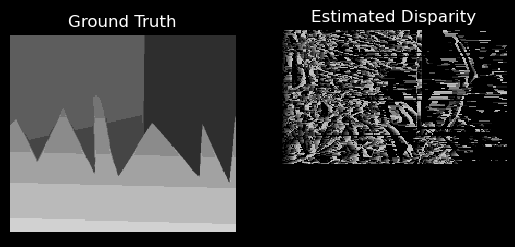

Procesing scanline  123
[[  28.90643971   84.31287942   84.83043024 ... 8234.48680737
  8574.50435819           inf]
 [          inf   72.42399053  117.99709691 ... 8235.87569626
  8602.00435819           inf]
 [          inf           inf  107.44154135 ... 8244.37569626
  8611.05991375           inf]
 ...
 [          inf           inf           inf ... 8636.37569626
  8248.39324708 8327.02190902]
 [          inf           inf           inf ... 8655.48680737
  8240.22658042 8422.74413124]
 [          inf           inf           inf ... 8665.2090296
  8242.00435819 8470.07746457]]


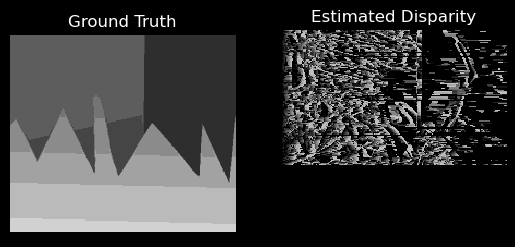

Procesing scanline  124
[[  14.51755082   21.03510164   23.94154135 ... 7385.87569626
  7878.78213597           inf]
 [          inf   23.0906572    28.55265247 ... 7386.37569626
  7921.94880264           inf]
 [          inf           inf   29.60820802 ... 7394.76458515
  8024.94880264           inf]
 ...
 [          inf           inf           inf ... 7805.87569626
  7388.94880264 7455.18857568]
 [          inf           inf           inf ... 7689.59791848
  7399.78213597 7514.68857568]
 [          inf           inf           inf ... 7634.76458515
  7429.39324708 7605.52190902]]


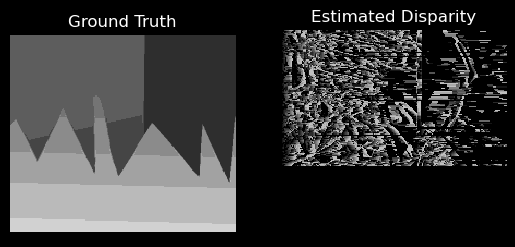

Procesing scanline  125
[[  11.40643971   20.14621275   25.71931913 ... 6920.98680737
            inf           inf]
 [          inf   19.97954609   23.3859858  ... 6962.43125182
            inf           inf]
 [          inf           inf   23.8859858  ... 7063.93125182
            inf           inf]
 ...
 [          inf           inf           inf ... 7189.93125182
  6953.39324708 6981.79968679]
 [          inf           inf           inf ... 7115.48680737
  6980.89324708 7026.41079791]
 [          inf           inf           inf ... 7035.32014071
  7022.00435819 7072.91079791]]


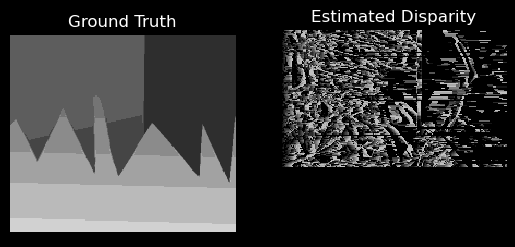

Procesing scanline  126
[[2.07310638e+00 6.81287942e+00 8.38598580e+00 ... 7.05393125e+03
             inf 7.27496635e+03]
 [           inf 5.14621275e+00 8.05265247e+00 ... 7.05493125e+03
             inf            inf]
 [           inf            inf 8.38598580e+00 ... 7.13893125e+03
             inf            inf]
 ...
 [           inf            inf            inf ... 6.95893125e+03
  6.96172658e+03 6.92146635e+03]
 [           inf            inf            inf ... 6.91493125e+03
  6.98200436e+03 6.95829969e+03]
 [           inf            inf            inf ... 6.89448681e+03
  7.04100436e+03 6.97746635e+03]]


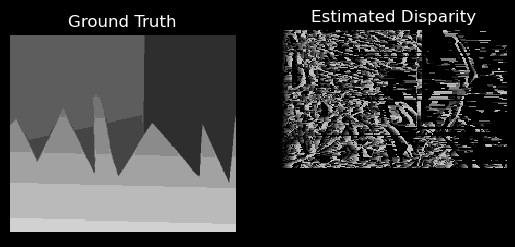

Procesing scanline  127
[[2.90643971e+00 5.81287942e+00 1.05526525e+01 ... 7.94737570e+03
  8.13967102e+03 7.97835524e+03]
 [           inf 6.14621275e+00 9.55265247e+00 ... 7.73087570e+03
             inf 8.12474413e+03]
 [           inf            inf 9.33043024e+00 ... 7.96326459e+03
  8.07394880e+03            inf]
 ...
 [           inf            inf            inf ... 7.72643125e+03
  7.77750436e+03 7.74585524e+03]
 [           inf            inf            inf ... 7.71193125e+03
  7.80283769e+03 7.77435524e+03]
 [           inf            inf            inf ... 7.70643125e+03
  7.84733769e+03 7.79835524e+03]]


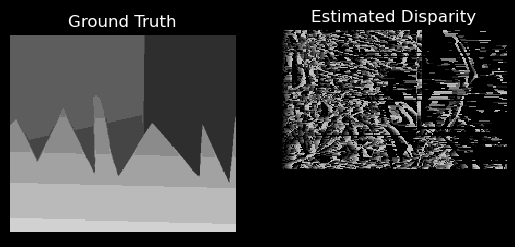

Procesing scanline  128
[[   8.73977304   45.47954609   79.49709691 ... 7439.7090296
  7736.89324708 7767.63302013]
 [          inf   46.47954609  128.71931913 ... 7448.37569626
  8008.44880264 7713.63302013]
 [          inf           inf  128.71931913 ... 7608.87569626
  7419.11546931 7976.52190902]
 ...
 [          inf           inf           inf ... 7391.48680737
  7470.39324708 7425.63302013]
 [          inf           inf           inf ... 7379.54236293
  7484.89324708 7460.13302013]
 [          inf           inf           inf ... 7369.37569626
  7510.28213597 7473.63302013]]


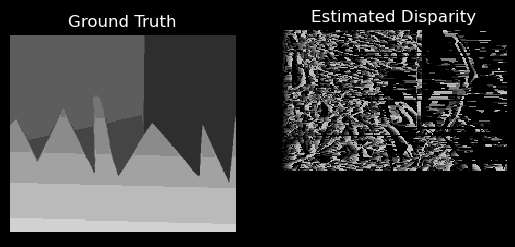

Procesing scanline  129
[[  95.40643971  165.47954609  220.8859858  ... 8802.87569626
  9391.72658042 9224.96635346]
 [          inf  266.47954609  200.49709691 ... 8883.54236293
  8872.61546931 9285.63302013]
 [          inf           inf  276.05265247 ... 8903.98680737
  8799.28213597 8844.74413124]
 ...
 [          inf           inf           inf ... 8780.54236293
  8863.72658042 8810.79968679]
 [          inf           inf           inf ... 8776.2090296
  8934.28213597 8838.29968679]
 [          inf           inf           inf ... 8777.37569626
  9013.94880264 8892.74413124]]


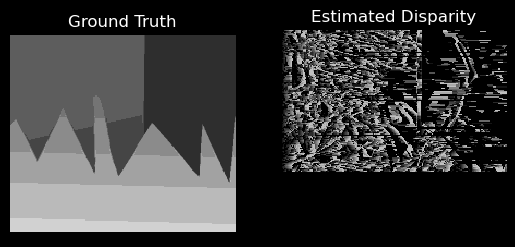

Procesing scanline  130
[[  146.51755082   195.25732387   226.66376358 ... 10105.26458515
  10662.22658042 10360.46635346]
 [           inf   242.92399053   209.16376358 ... 10143.76458515
  10191.17102486 10397.96635346]
 [           inf            inf   235.83043024 ... 10143.76458515
  10124.67102486 10130.24413124]
 ...
 [           inf            inf            inf ... 10106.82014071
  10147.17102486 10131.29968679]
 [           inf            inf            inf ... 10104.65347404
  10182.72658042 10126.24413124]
 [           inf            inf            inf ... 10103.65347404
  10194.55991375 10128.46635346]]


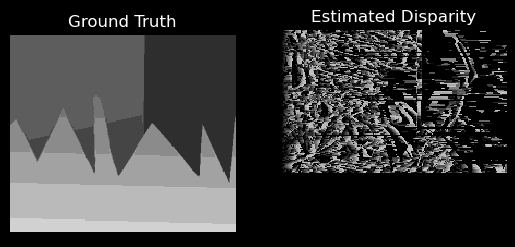

Procesing scanline  131
[[124.73977304 244.31287942 289.27487469 ...          inf          inf
           inf]
 [         inf 225.75732387 340.27487469 ...          inf          inf
           inf]
 [         inf          inf 322.16376358 ...          inf          inf
           inf]
 ...
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]]


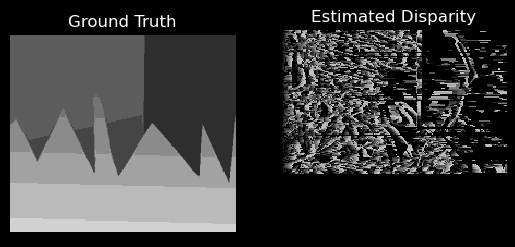

Procesing scanline  132
[[357.57310638 448.47954609 539.3859858  ...          inf          inf
           inf]
 [         inf 547.47954609 569.05265247 ...          inf          inf
           inf]
 [         inf          inf 679.05265247 ...          inf          inf
           inf]
 ...
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]]


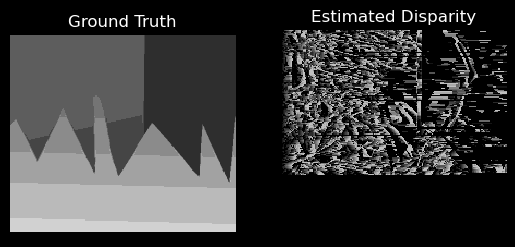

Procesing scanline  133
[[432.23977304 491.14621275 557.3859858  ...          inf          inf
           inf]
 [         inf 641.97954609 638.66376358 ...          inf          inf
           inf]
 [         inf          inf 849.71931913 ...          inf          inf
           inf]
 ...
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]]


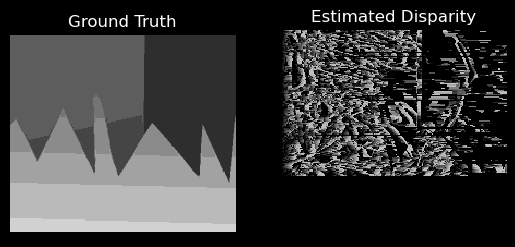

Procesing scanline  134
[[322.90643971 378.31287942 497.8859858  ...          inf          inf
           inf]
 [         inf 605.97954609 531.55265247 ...          inf          inf
           inf]
 [         inf          inf 851.55265247 ...          inf          inf
           inf]
 ...
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]
 [         inf          inf          inf ...          inf          inf
           inf]]


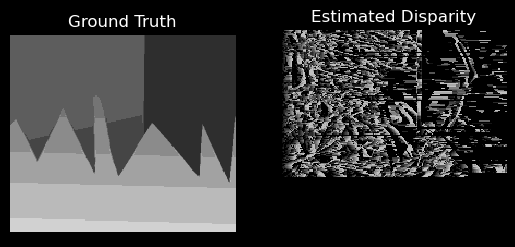

Procesing scanline  135
[[  66.23977304  190.97954609  242.99709691 ... 6253.15347404
  6231.61546931 6228.85524235]
 [          inf  237.31287942  225.99709691 ... 6231.65347404
  6248.50435819 6238.18857568]
 [          inf           inf  250.8859858  ... 6233.59791848
  6230.00435819 6256.85524235]
 ...
 [          inf           inf           inf ... 6224.98680737
  6239.17102486 6236.35524235]
 [          inf           inf           inf ... 6216.09791848
  6223.67102486 6246.63302013]
 [          inf           inf           inf ... 6221.15347404
  6219.11546931 6229.13302013]]


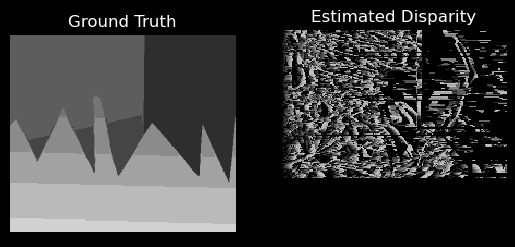

Procesing scanline  136
[[ 274.23977304  329.64621275  339.66376358 ... 5234.09791848
  5223.61546931 5393.68857568]
 [          inf  433.31287942  359.55265247 ... 5343.04236293
  5230.33769153 5407.13302013]
 [          inf           inf  440.21931913 ... 5303.93125182
  5312.50435819 5344.18857568]
 ...
 [          inf           inf           inf ... 5255.54236293
  5267.17102486 5270.18857568]
 [          inf           inf           inf ... 5237.26458515
  5243.67102486 5273.35524235]
 [          inf           inf           inf ... 5220.59791848
  5230.61546931 5306.85524235]]


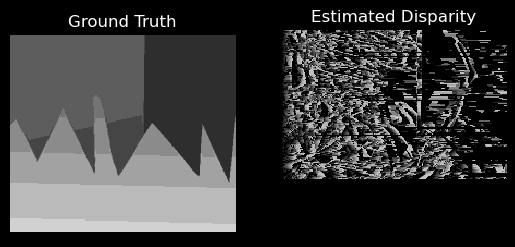

Procesing scanline  137
[[ 135.40643971  201.64621275  223.71931913 ... 4324.82014071
  4333.55991375 4424.29968679]
 [          inf  294.47954609  209.16376358 ... 4350.32014071
  4333.39324708 4384.29968679]
 [          inf           inf  210.21931913 ... 4439.2090296
  4327.89324708 4379.91079791]
 ...
 [          inf           inf           inf ... 4343.87569626
  4343.89324708 4348.91079791]
 [          inf           inf           inf ... 4329.7090296
  4328.33769153 4330.85524235]
 [          inf           inf           inf ... 4324.82014071
  4330.39324708 4360.29968679]]


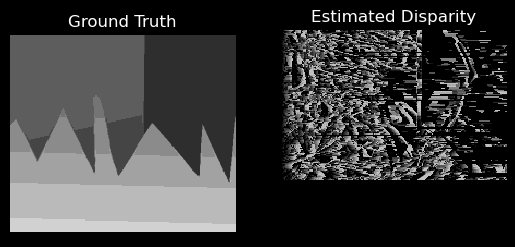

Procesing scanline  138
[[ 170.07310638  174.0906572   240.33043024 ... 5053.7090296
  5073.28213597 5081.35524235]
 [          inf  185.5906572   294.66376358 ... 5059.93125182
  5069.28213597 5076.52190902]
 [          inf           inf  345.16376358 ... 5063.7090296
  5077.72658042 5073.85524235]
 ...
 [          inf           inf           inf ... 5109.93125182
  5280.78213597 5174.68857568]
 [          inf           inf           inf ... 5080.43125182
  5137.72658042 5254.02190902]
 [          inf           inf           inf ... 5067.93125182
  5103.22658042 5127.63302013]]


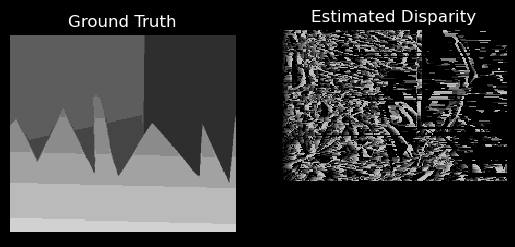

Procesing scanline  139
[[  39.57310638  139.5906572   249.16376358 ... 4067.87569626
  4057.55991375 4052.18857568]
 [          inf  187.0906572   298.66376358 ... 4047.87569626
  4067.28213597 4056.18857568]
 [          inf           inf  356.16376358 ... 4047.87569626
  4050.61546931 4063.68857568]
 ...
 [          inf           inf           inf ... 4141.2090296
  4055.94880264 4049.52190902]
 [          inf           inf           inf ... 4177.37569626
  4133.94880264 4055.02190902]
 [          inf           inf           inf ... 4127.37569626
  4167.78213597 4121.46635346]]


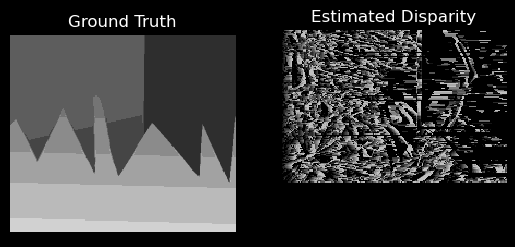

Procesing scanline  140
[[ 119.57310638  214.97954609  233.05265247 ... 3754.43125182
  3760.94880264 3762.96635346]
 [          inf  230.14621275  258.49709691 ... 3765.98680737
  3761.94880264 3765.96635346]
 [          inf           inf  267.99709691 ... 3769.98680737
  3773.50435819 3765.96635346]
 ...
 [          inf           inf           inf ... 3755.48680737
  3763.00435819 3766.68857568]
 [          inf           inf           inf ... 3764.98680737
  3763.00435819 3766.68857568]
 [          inf           inf           inf ... 3830.15347404
  3773.50435819 3766.68857568]]


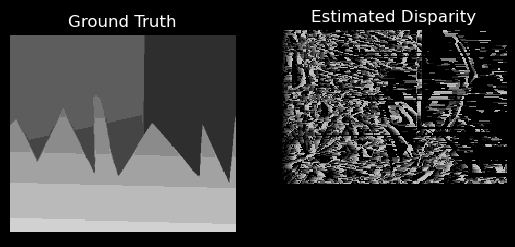

Procesing scanline  141
[[  52.01755082   74.0906572    85.49709691 ... 5193.09791848
  5209.33769153 5434.74413124]
 [          inf   81.92399053  106.49709691 ... 5195.09791848
  5197.00435819 5203.52190902]
 [          inf           inf  114.66376358 ... 5197.59791848
  5201.67102486 5200.52190902]
 ...
 [          inf           inf           inf ... 5194.09791848
  5228.11546931 5209.41079791]
 [          inf           inf           inf ... 5217.59791848
  5201.67102486 5216.07746457]
 [          inf           inf           inf ... 5193.15347404
  5229.89324708 5200.52190902]]


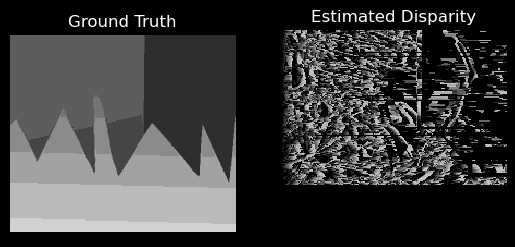

Procesing scanline  142
[[   7.57310638   23.81287942   30.99709691 ... 5261.87569626
  5461.89324708 5161.41079791]
 [          inf   18.5906572    27.33043024 ... 5136.48680737
  5260.50435819 5371.63302013]
 [          inf           inf   24.33043024 ... 5129.48680737
  5138.22658042 5208.91079791]
 ...
 [          inf           inf           inf ... 5144.54236293
  5277.00435819 5234.91079791]
 [          inf           inf           inf ... 5135.2090296
  5146.72658042 5221.41079791]
 [          inf           inf           inf ... 5135.2090296
  5138.05991375 5137.79968679]]


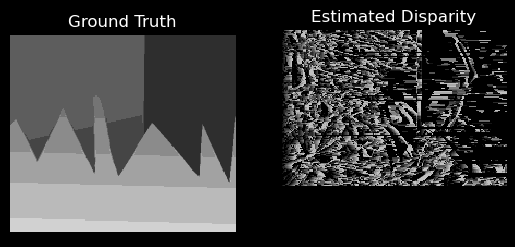

Procesing scanline  143
[[2.51755082e+00 5.42399053e+00 7.94154135e+00 ... 6.65709792e+03
  6.50633769e+03 6.53057746e+03]
 [           inf 5.59065720e+00 7.66376358e+00 ... 6.79326459e+03
  6.61878214e+03 6.51874413e+03]
 [           inf            inf 9.33043024e+00 ... 6.58243125e+03
  6.73383769e+03 6.56985524e+03]
 ...
 [           inf            inf            inf ... 6.50509792e+03
  6.54100436e+03 6.55291080e+03]
 [           inf            inf            inf ... 6.50704236e+03
  6.50900436e+03 6.51874413e+03]
 [           inf            inf            inf ... 6.50326459e+03
  6.50883769e+03 6.51074413e+03]]


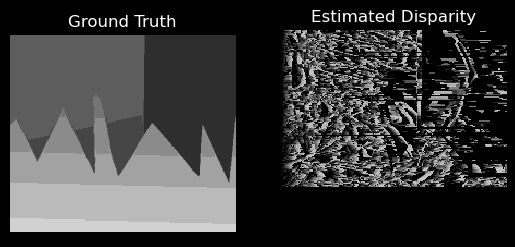

Procesing scanline  144
[[  10.01755082   16.53510164   20.55265247 ... 8239.2090296
  8234.28213597 8244.35524235]
 [          inf   18.5906572    23.10820802 ... 8230.04236293
  8238.78213597 8249.18857568]
 [          inf           inf   24.05265247 ... 8342.32014071
  8233.78213597 8261.85524235]
 ...
 [          inf           inf           inf ... 8229.87569626
  8231.94880264 8236.68857568]
 [          inf           inf           inf ... 8229.87569626
  8232.39324708 8242.41079791]
 [          inf           inf           inf ... 8235.54236293
  8233.39324708 8238.52190902]]


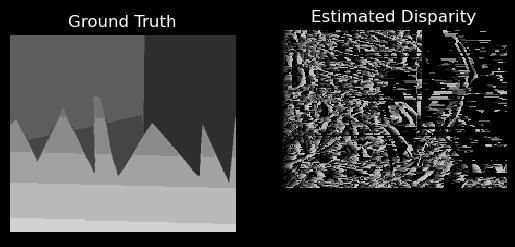

Procesing scanline  145
[[6.51755082e+00 9.92399053e+00 1.19970969e+01 ... 1.04313201e+04
  1.04241155e+04 1.04334664e+04]
 [           inf 1.50906572e+01 1.31637636e+01 ... 1.04457090e+04
  1.04241155e+04 1.04334664e+04]
 [           inf            inf 1.56637636e+01 ... 1.04525424e+04
  1.04307266e+04 1.04334664e+04]
 ...
 [           inf            inf            inf ... 1.04258201e+04
  1.04427821e+04 1.05330219e+04]
 [           inf            inf            inf ... 1.04202090e+04
  1.04224488e+04 1.04324664e+04]
 [           inf            inf            inf ... 1.04215424e+04
  1.04241155e+04 1.04299664e+04]]


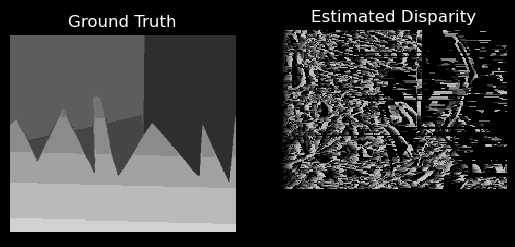

Procesing scanline  146
[[   14.51755082    18.53510164    20.60820802 ... 12151.93125182
  12151.11546931 12158.85524235]
 [           inf    22.03510164    21.77487469 ... 12151.2090296
  12152.50435819 12162.41079791]
 [           inf            inf    22.94154135 ... 12154.76458515
  12151.11546931 12164.35524235]
 ...
 [           inf            inf            inf ... 12251.2090296
  12219.17102486 12149.07746457]
 [           inf            inf            inf ... 12202.93125182
  12271.11546931 12203.24413124]
 [           inf            inf            inf ... 12149.59791848
  12219.17102486 12249.07746457]]


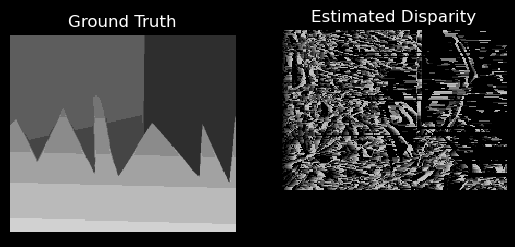

Procesing scanline  147
[[   24.23977304    30.75732387    48.83043024 ... 10652.09791848
  10638.50435819 10636.85524235]
 [           inf    29.97954609    44.49709691 ... 10647.43125182
  10651.33769153 10646.57746457]
 [           inf            inf    49.05265247 ... 10645.26458515
  10647.11546931 10661.74413124]
 ...
 [           inf            inf            inf ... 10626.09791848
  10640.61546931 10667.07746457]
 [           inf            inf            inf ... 10718.59791848
  10629.33769153 10649.35524235]
 [           inf            inf            inf ... 10812.09791848
  10731.83769153 10633.74413124]]


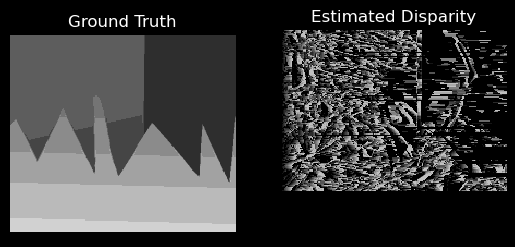

Procesing scanline  148
[[5.57310638e+00 1.43128794e+01 7.32193191e+01 ... 9.38054236e+03
  9.39678214e+03 9.40085524e+03]
 [           inf 2.65906572e+01 8.53859858e+01 ... 9.39654236e+03
  9.38628214e+03 9.39913302e+03]
 [           inf            inf 1.15330430e+02 ... 9.40270903e+03
  9.38805991e+03 9.38863302e+03]
 ...
 [           inf            inf            inf ... 9.39298681e+03
  9.38444880e+03 9.38696635e+03]
 [           inf            inf            inf ... 9.38720903e+03
  9.38628214e+03 9.38713302e+03]
 [           inf            inf            inf ... 9.38604236e+03
  9.38405991e+03 9.38963302e+03]]


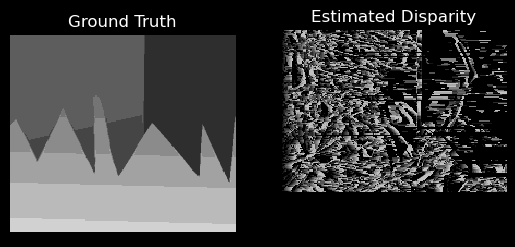

Procesing scanline  149
[[  135.40643971   184.14621275   373.05265247 ... 10234.04236293
  10231.28213597 10221.13302013]
 [           inf   198.92399053   436.55265247 ... 10230.04236293
  10257.55991375 10228.52190902]
 [           inf            inf   467.21931913 ... 10214.87569626
  10251.61546931 10251.13302013]
 ...
 [           inf            inf            inf ... 10220.15347404
  10217.28213597 10224.68857568]
 [           inf            inf            inf ... 10216.7090296
  10217.55991375 10219.18857568]
 [           inf            inf            inf ... 10214.04236293
  10216.11546931 10220.13302013]]


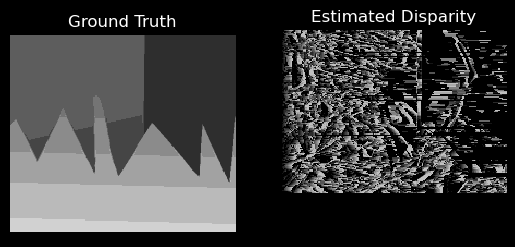

Procesing scanline  150
[[  251.40643971   403.64621275   655.05265247 ... 10113.82014071
  10119.78213597 10118.35524235]
 [           inf   503.81287942   686.71931913 ... 10149.87569626
  10122.61546931 10123.68857568]
 [           inf            inf   817.55265247 ... 10138.7090296
  10161.11546931 10126.52190902]
 ...
 [           inf            inf            inf ... 10088.82014071
  10107.28213597 10106.96635346]
 [           inf            inf            inf ... 10082.04236293
  10094.94880264 10111.18857568]
 [           inf            inf            inf ... 10084.54236293
  10085.94880264 10098.85524235]]


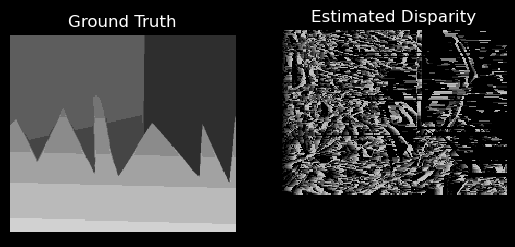

Procesing scanline  151
[[ 251.40643971  600.14621275  795.55265247 ... 6806.82014071
  6798.11546931 6800.79968679]
 [          inf  674.92399053  907.3859858  ... 6797.7090296
  6858.78213597 6838.13302013]
 [          inf           inf  976.71931913 ... 6802.2090296
  6848.78213597 6897.24413124]
 ...
 [          inf           inf           inf ... 6768.32014071
  6821.44880264 6860.79968679]
 [          inf           inf           inf ... 6738.2090296
  6816.28213597 6860.79968679]
 [          inf           inf           inf ... 6758.82014071
  6781.72658042 6855.74413124]]


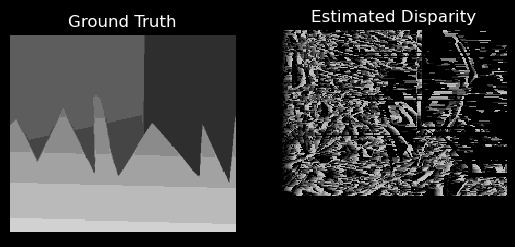

Procesing scanline  152
[[ 140.90643971  214.92399053  310.33043024 ... 6331.65347404
  6355.89324708 6367.29968679]
 [          inf  266.64621275  335.49709691 ... 6401.65347404
  6369.39324708 6378.96635346]
 [          inf           inf  398.44154135 ... 6427.48680737
  6437.39324708 6390.91079791]
 ...
 [          inf           inf           inf ... 6392.09791848
  6419.17102486 6443.41079791]
 [          inf           inf           inf ... 6411.65347404
  6428.05991375 6439.13302013]
 [          inf           inf           inf ... 6405.59791848
  6447.17102486 6447.79968679]]


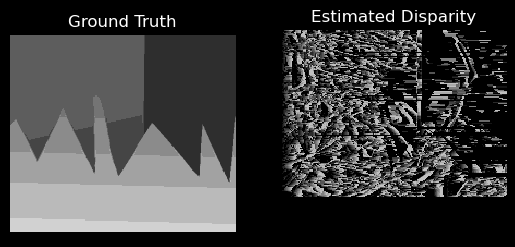

Procesing scanline  153
[[  31.40643971   80.14621275  106.8859858  ... 6589.37569626
  6607.44880264 6616.18857568]
 [          inf   69.14621275  117.8859858  ... 6620.37569626
  6616.89324708 6624.68857568]
 [          inf           inf  106.8859858  ... 6713.7090296
  6645.78213597 6632.68857568]
 ...
 [          inf           inf           inf ... 6713.7090296
  6681.28213597 6686.52190902]
 [          inf           inf           inf ... 6783.98680737
  6736.89324708 6694.96635346]
 [          inf           inf           inf ... 6652.37569626
  6805.94880264 6749.35524235]]


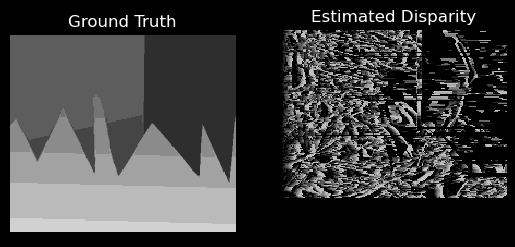

Procesing scanline  154
[[  26.51755082   81.92399053  137.33043024 ... 8947.43125182
  8950.83769153 8952.85524235]
 [          inf   86.42399053  149.16376358 ... 8966.93125182
  8957.17102486 8955.85524235]
 [          inf           inf  152.99709691 ... 9065.54236293
  8972.67102486 8961.85524235]
 ...
 [          inf           inf           inf ... 9026.43125182
  9022.44880264 9056.57746457]
 [          inf           inf           inf ... 9165.09791848
  9026.50435819 9029.91079791]
 [          inf           inf           inf ... 9070.93125182
  9157.17102486 9034.07746457]]


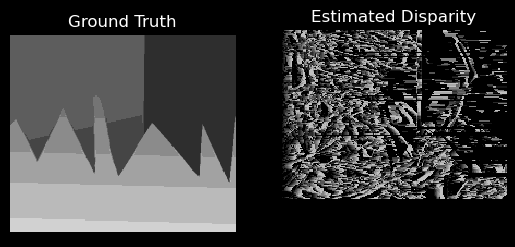

Procesing scanline  155
[[  28.90643971   84.31287942  139.71931913 ... 7982.98680737
  7991.72658042 7996.46635346]
 [          inf  103.92399053  147.83043024 ... 8026.48680737
  8008.22658042 7999.24413124]
 [          inf           inf  167.55265247 ... 8068.7090296
  8054.05991375 8012.74413124]
 ...
 [          inf           inf           inf ... 8073.54236293
  8119.39324708 8092.74413124]
 [          inf           inf           inf ... 8046.2090296
  8103.55991375 8117.46635346]
 [          inf           inf           inf ... 8073.54236293
  8074.89324708 8102.29968679]]


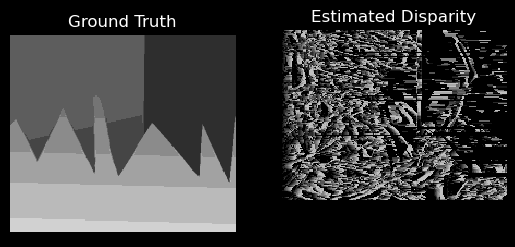

Procesing scanline  156
[[  34.01755082   76.53510164  163.05265247 ... 6427.2090296
  6434.78213597 6438.18857568]
 [          inf   90.42399053  177.55265247 ... 6449.32014071
  6441.11546931 6439.18857568]
 [          inf           inf  197.10820802 ... 6524.87569626
  6462.22658042 6442.29968679]
 ...
 [          inf           inf           inf ... 6556.2090296
  6514.72658042 6494.68857568]
 [          inf           inf           inf ... 6529.82014071
  6569.11546931 6502.02190902]
 [          inf           inf           inf ... 6497.54236293
  6542.72658042 6550.29968679]]


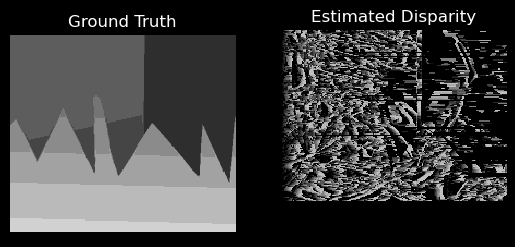

Procesing scanline  157
[[5.57310638e+00 1.84795461e+01 5.80526525e+01 ... 5.81487570e+03
  5.86361547e+03 5.84302191e+03]
 [           inf 1.79795461e+01 5.47193191e+01 ... 5.81387570e+03
  5.83011547e+03 5.85552191e+03]
 [           inf            inf 5.29970969e+01 ... 5.82187570e+03
  5.84378214e+03 5.82879969e+03]
 ...
 [           inf            inf            inf ... 5.81393125e+03
  5.84533769e+03 5.85018858e+03]
 [           inf            inf            inf ... 5.82326459e+03
  5.84628214e+03 5.84085524e+03]
 [           inf            inf            inf ... 5.81743125e+03
  5.88494880e+03 5.84085524e+03]]


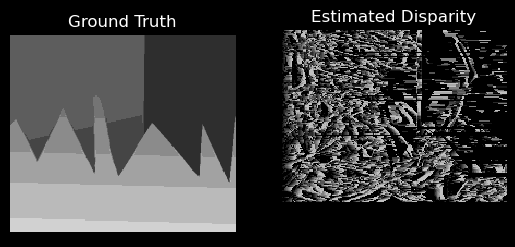

Procesing scanline  158
[[   7.57310638   34.0906572    45.71931913 ... 5488.04236293
  5490.28213597 5492.35524235]
 [          inf   26.64621275  122.05265247 ... 5495.26458515
  5491.28213597 5493.29968679]
 [          inf           inf  105.71931913 ... 5506.54236293
  5496.61546931 5493.29968679]
 ...
 [          inf           inf           inf ... 5564.59791848
  5551.55991375 5540.02190902]
 [          inf           inf           inf ... 5650.54236293
  5563.05991375 5546.68857568]
 [          inf           inf           inf ... 5656.59791848
  5647.11546931 5557.52190902]]


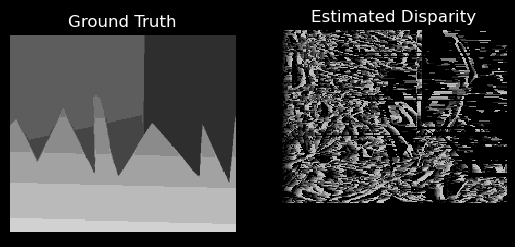

Procesing scanline  159
[[  52.01755082  114.53510164  119.27487469 ... 5565.26458515
  5568.17102486 5570.68857568]
 [          inf  143.92399053  139.77487469 ... 5566.76458515
  5568.28213597 5571.18857568]
 [          inf           inf  158.05265247 ... 5565.93125182
  5569.33769153 5571.18857568]
 ...
 [          inf           inf           inf ... 5649.54236293
  5618.28213597 5593.41079791]
 [          inf           inf           inf ... 5641.09791848
  5644.33769153 5621.18857568]
 [          inf           inf           inf ... 5682.59791848
  5636.33769153 5647.24413124]]


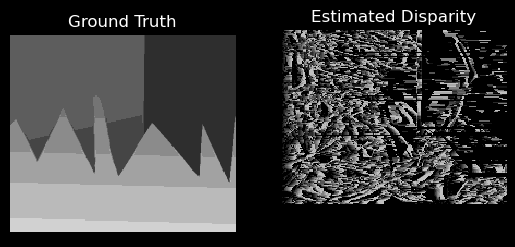

Procesing scanline  160
[[  31.40643971   90.31287942   43.05265247 ... 5081.87569626
  5088.39324708 5106.63302013]
 [          inf   39.97954609  106.21931913 ... 5081.04236293
  5083.55991375 5101.63302013]
 [          inf           inf   46.55265247 ... 5083.2090296
  5084.28213597 5093.02190902]
 ...
 [          inf           inf           inf ... 5085.37569626
  5084.94880264 5086.79968679]
 [          inf           inf           inf ... 5088.54236293
  5084.94880264 5087.46635346]
 [          inf           inf           inf ... 5108.7090296
  5086.78213597 5087.46635346]]


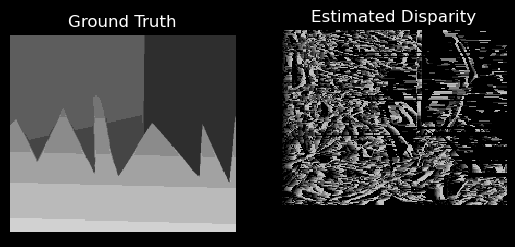

Procesing scanline  161
[[  39.57310638   46.0906572    60.60820802 ... 4569.48680737
  4579.00435819 4618.57746457]
 [          inf   56.81287942   52.66376358 ... 4574.87569626
  4612.33769153 4629.24413124]
 [          inf           inf   61.60820802 ... 4574.87569626
  4618.28213597 4663.91079791]
 ...
 [          inf           inf           inf ... 4505.7090296
  4563.83769153 4634.74413124]
 [          inf           inf           inf ... 4464.98680737
  4540.78213597 4613.41079791]
 [          inf           inf           inf ... 4453.26458515
  4492.83769153 4588.24413124]]


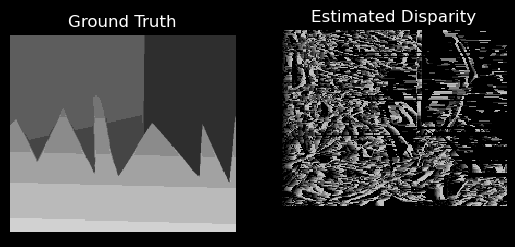

Procesing scanline  162
[[  82.23977304  104.31287942  109.05265247 ... 3205.82014071
  3231.05991375 3246.13302013]
 [          inf  149.47954609  123.3859858  ... 3211.76458515
  3228.67102486 3249.07746457]
 [          inf           inf  179.33043024 ... 3205.59791848
  3241.72658042 3246.13302013]
 ...
 [          inf           inf           inf ... 3202.26458515
  3216.67102486 3233.07746457]
 [          inf           inf           inf ... 3202.26458515
  3205.55991375 3229.79968679]
 [          inf           inf           inf ... 3211.15347404
  3205.55991375 3213.13302013]]


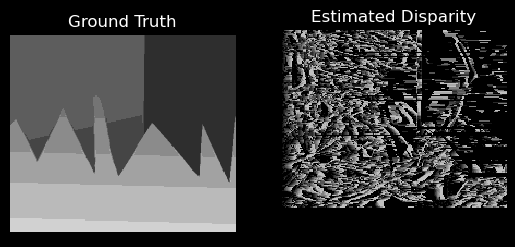

Procesing scanline  163
[[  36.73977304   54.81287942   88.83043024 ... 3596.43125182
  3598.50435819 3622.74413124]
 [          inf   71.75732387   64.55265247 ... 3597.2090296
  3599.44880264 3621.52190902]
 [          inf           inf   75.83043024 ... 3597.43125182
  3600.33769153 3628.41079791]
 ...
 [          inf           inf           inf ... 3605.2090296
  3600.83769153 3615.74413124]
 [          inf           inf           inf ... 3631.93125182
  3603.00435819 3614.02190902]
 [          inf           inf           inf ... 3657.7090296
  3623.94880264 3609.52190902]]


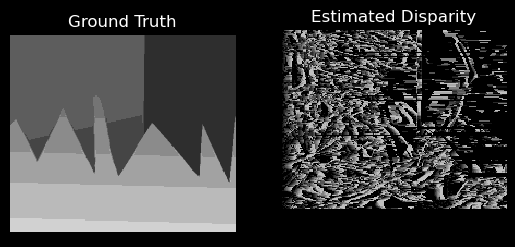

Procesing scanline  164
[[ 140.90643971  167.42399053  169.44154135 ... 3607.37569626
  3612.94880264 3616.18857568]
 [          inf  251.47954609  210.94154135 ... 3608.04236293
  3612.05991375 3616.18857568]
 [          inf           inf  309.33043024 ... 3608.37569626
  3611.78213597 3614.85524235]
 ...
 [          inf           inf           inf ... 3626.37569626
  3630.44880264 3621.46635346]
 [          inf           inf           inf ... 3676.43125182
  3618.39324708 3635.68857568]
 [          inf           inf           inf ... 3736.37569626
  3657.11546931 3622.85524235]]


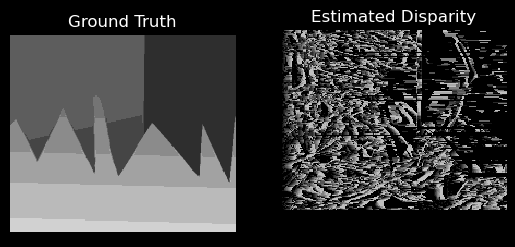

Procesing scanline  165
[[  11.40643971   22.81287942   24.8859858  ... 2496.48680737
  2499.39324708 2501.63302013]
 [          inf   23.81287942   26.71931913 ... 2497.32014071
  2499.33769153 2502.74413124]
 [          inf           inf   26.71931913 ... 2497.43125182
  2499.44880264 2501.52190902]
 ...
 [          inf           inf           inf ... 2529.43125182
  2524.00435819 2509.07746457]
 [          inf           inf           inf ... 2565.48680737
  2534.22658042 2524.57746457]
 [          inf           inf           inf ... 2569.43125182
  2571.50435819 2534.35524235]]


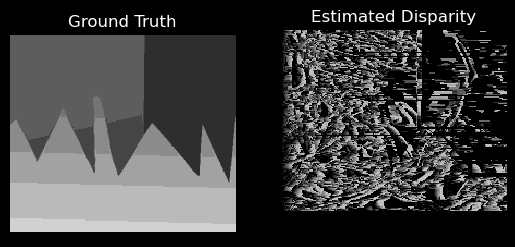

Procesing scanline  166
[[   3.40643971    6.31287942    8.83043024 ... 2352.37569626
  2359.94880264 2362.91079791]
 [          inf    7.81287942    9.55265247 ... 2352.48680737
  2355.39324708 2358.29968679]
 [          inf           inf    9.83043024 ... 2357.37569626
  2355.89324708 2358.13302013]
 ...
 [          inf           inf           inf ... 2402.87569626
  2390.11546931 2370.91079791]
 [          inf           inf           inf ... 2402.87569626
  2408.78213597 2378.46635346]
 [          inf           inf           inf ... 2362.26458515
  2408.78213597 2393.13302013]]


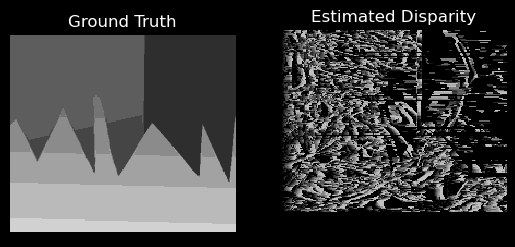

Procesing scanline  167
[[2.07310638e+00 4.09065720e+00 6.33043024e+00 ... 2.34498681e+03
  2.35189325e+03 2.34879969e+03]
 [           inf 5.14621275e+00 7.16376358e+00 ... 2.34676459e+03
  2.35072658e+03 2.34746635e+03]
 [           inf            inf 7.33043024e+00 ... 2.35315347e+03
  2.35317102e+03 2.34741080e+03]
 ...
 [           inf            inf            inf ... 2.34409792e+03
  2.36522658e+03 2.35541080e+03]
 [           inf            inf            inf ... 2.34337570e+03
  2.34967102e+03 2.35191080e+03]
 [           inf            inf            inf ... 2.34215347e+03
  2.34439325e+03 2.34646635e+03]]


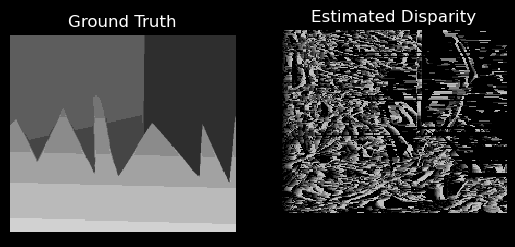

Procesing scanline  168
[[   2.51755082    5.03510164    7.94154135 ... 2490.82014071
  2499.50435819 2495.63302013]
 [          inf    6.03510164    8.94154135 ... 2489.48680737
  2502.39324708 2496.29968679]
 [          inf           inf    8.94154135 ... 2489.48680737
  2497.05991375 2497.41079791]
 ...
 [          inf           inf           inf ... 2489.48680737
  2492.89324708 2495.41079791]
 [          inf           inf           inf ... 2489.48680737
  2495.05991375 2495.91079791]
 [          inf           inf           inf ... 2489.48680737
  2497.05991375 2495.41079791]]


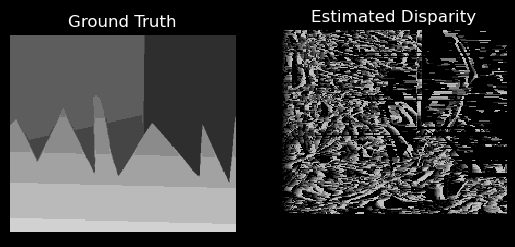

Procesing scanline  169
[[2.90643971e+00 5.81287942e+00 8.33043024e+00 ... 3.42832014e+03
  3.43083769e+03 3.43291080e+03]
 [           inf 6.81287942e+00 9.71931913e+00 ... 3.43237570e+03
  3.43183769e+03 3.43435524e+03]
 [           inf            inf 9.71931913e+00 ... 3.43554236e+03
  3.43489325e+03 3.43435524e+03]
 ...
 [           inf            inf            inf ... 3.46082014e+03
  3.44933769e+03 3.44991080e+03]
 [           inf            inf            inf ... 3.46082014e+03
  3.46333769e+03 3.45185524e+03]
 [           inf            inf            inf ... 3.45332014e+03
  3.46333769e+03 3.46585524e+03]]


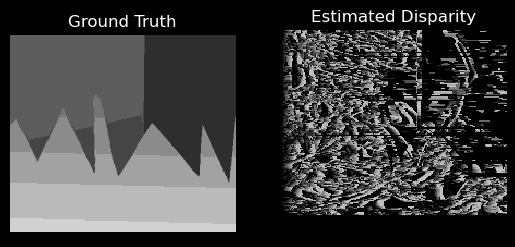

Procesing scanline  170
[[3.40643971e+00 6.81287942e+00 9.71931913e+00 ... 3.42487570e+03
  3.42694880e+03 3.42985524e+03]
 [           inf 8.42399053e+00 1.07193191e+01 ... 3.42470903e+03
  3.42672658e+03 3.42963302e+03]
 [           inf            inf 1.12193191e+01 ... 3.42454236e+03
  3.42705991e+03 3.43046635e+03]
 ...
 [           inf            inf            inf ... 3.44248681e+03
  3.44005991e+03 3.43424413e+03]
 [           inf            inf            inf ... 3.45387570e+03
  3.45694880e+03 3.43529969e+03]
 [           inf            inf            inf ... 3.45387570e+03
  3.47111547e+03 3.44774413e+03]]


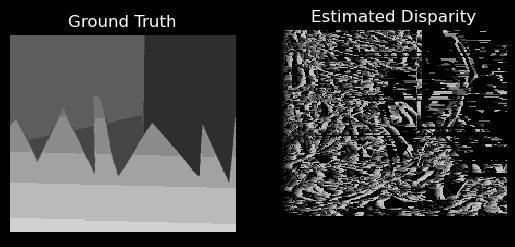

Procesing scanline  171
[[3.40643971e+00 6.31287942e+00 8.83043024e+00 ... 4.10820903e+03
  4.11378214e+03 4.11763302e+03]
 [           inf 7.81287942e+00 1.02193191e+01 ... 4.10915347e+03
  4.11317102e+03 4.11791080e+03]
 [           inf            inf 1.07193191e+01 ... 4.10937570e+03
  4.11261547e+03 4.11602191e+03]
 ...
 [           inf            inf            inf ... 4.13137570e+03
  4.12922658e+03 4.12502191e+03]
 [           inf            inf            inf ... 4.15587570e+03
  4.14594880e+03 4.13168858e+03]
 [           inf            inf            inf ... 4.15270903e+03
  4.17544880e+03 4.14763302e+03]]


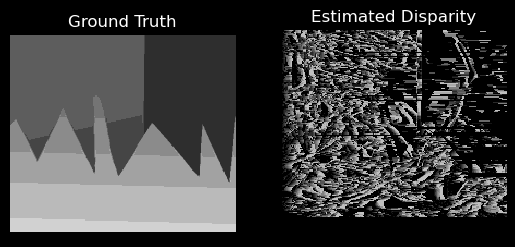

Procesing scanline  172
[[2.90643971e+00 4.97954609e+00 7.49709691e+00 ... 3.82437570e+03
  3.82778214e+03 3.83252191e+03]
 [           inf 6.42399053e+00 8.21931913e+00 ... 3.82626459e+03
  3.82878214e+03 3.83218858e+03]
 [           inf            inf 8.88598580e+00 ... 3.82737570e+03
  3.83189325e+03 3.83218858e+03]
 ...
 [           inf            inf            inf ... 3.83959792e+03
  3.84161547e+03 3.84502191e+03]
 [           inf            inf            inf ... 3.86893125e+03
  3.85189325e+03 3.84502191e+03]
 [           inf            inf            inf ... 3.87876459e+03
  3.88789325e+03 3.85529969e+03]]


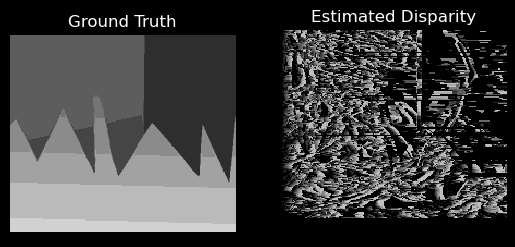

Procesing scanline  173
[[   4.01755082    8.03510164   10.55265247 ... 3885.04236293
  3887.28213597 3889.79968679]
 [          inf   10.5906572    11.94154135 ... 3886.43125182
  3888.11546931 3890.63302013]
 [          inf           inf   13.05265247 ... 3888.26458515
  3888.05991375 3892.07746457]
 ...
 [          inf           inf           inf ... 3899.76458515
  3891.61546931 3891.18857568]
 [          inf           inf           inf ... 3907.76458515
  3896.05991375 3890.79968679]
 [          inf           inf           inf ... 3926.04236293
  3902.28213597 3893.02190902]]


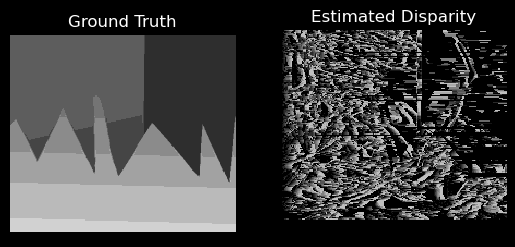

Procesing scanline  174
[[   6.51755082   11.25732387   15.99709691 ... 3980.48680737
  3983.00435819 3985.07746457]
 [          inf   14.03510164   16.99709691 ... 3981.7090296
  3983.72658042 3985.79968679]
 [          inf           inf   18.77487469 ... 3981.98680737
  3984.39324708 3986.02190902]
 ...
 [          inf           inf           inf ... 3987.04236293
  3987.05991375 3987.41079791]
 [          inf           inf           inf ... 3990.87569626
  3991.50435819 3988.02190902]
 [          inf           inf           inf ... 3999.48680737
  3996.00435819 3991.57746457]]


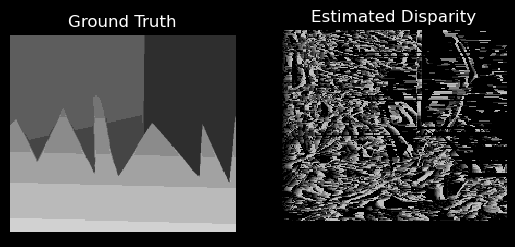

Procesing scanline  175
[[   4.01755082    8.03510164   14.55265247 ... 3743.09791848
  3745.17102486 3763.24413124]
 [          inf    9.75732387   16.60820802 ... 3744.32014071
  3746.17102486 3762.41079791]
 [          inf           inf   17.77487469 ... 3745.26458515
  3746.11546931 3766.13302013]
 ...
 [          inf           inf           inf ... 3749.43125182
  3748.83769153 3759.07746457]
 [          inf           inf           inf ... 3763.93125182
  3748.83769153 3753.74413124]
 [          inf           inf           inf ... 3763.93125182
  3760.33769153 3753.74413124]]


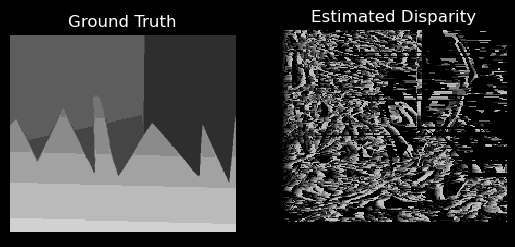

Procesing scanline  176
[[   8.73977304   17.47954609   23.8859858  ... 4523.82014071
  4601.89324708 4609.74413124]
 [          inf   15.31287942   26.71931913 ... 4523.54236293
  4589.78213597 4602.41079791]
 [          inf           inf   23.8859858  ... 4523.43125182
  4585.94880264 4592.24413124]
 ...
 [          inf           inf           inf ... 4533.76458515
  4555.83769153 4567.74413124]
 [          inf           inf           inf ... 4536.87569626
  4546.50435819 4563.52190902]
 [          inf           inf           inf ... 4544.43125182
  4542.50435819 4555.41079791]]


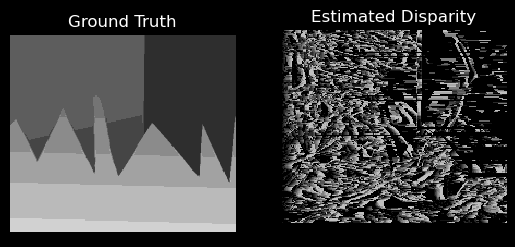

Procesing scanline  177
[[2.23977304e+00 7.81287942e+00 1.81637636e+01 ... 5.86009792e+03
  5.95444880e+03 5.91885524e+03]
 [           inf 5.75732387e+00 1.22748747e+01 ... 5.86109792e+03
  5.92750436e+03 5.91535524e+03]
 [           inf            inf 9.66376358e+00 ... 5.86109792e+03
  5.92750436e+03 5.89952191e+03]
 ...
 [           inf            inf            inf ... 5.83359792e+03
  5.88194880e+03 5.87618858e+03]
 [           inf            inf            inf ... 5.81843125e+03
  5.88600436e+03 5.87618858e+03]
 [           inf            inf            inf ... 5.80693125e+03
  5.85894880e+03 5.87702191e+03]]


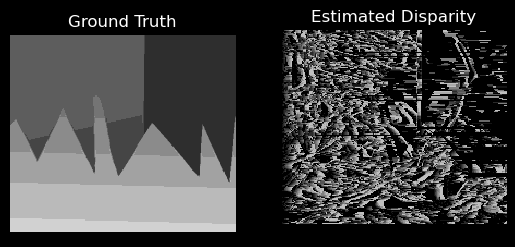

Procesing scanline  178
[[  86.51755082  156.5906572   211.99709691 ... 6139.04236293
  6163.22658042 6193.74413124]
 [          inf  161.53510164  252.99709691 ... 6133.32014071
  6152.11546931 6193.74413124]
 [          inf           inf  257.60820802 ... 6111.54236293
  6146.72658042 6183.96635346]
 ...
 [          inf           inf           inf ... 6081.2090296
  6098.94880264 6157.29968679]
 [          inf           inf           inf ... 6059.82014071
  6098.94880264 6138.13302013]
 [          inf           inf           inf ... 6015.7090296
  6078.22658042 6137.13302013]]


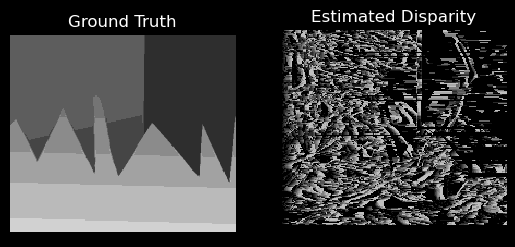

Procesing scanline  179
[[  26.51755082   32.0906572    34.16376358 ... 5158.76458515
  5164.50435819 5155.35524235]
 [          inf   49.5906572    39.60820802 ... 5145.59791848
  5160.00435819 5151.63302013]
 [          inf           inf   57.33043024 ... 5141.43125182
  5147.17102486 5148.02190902]
 ...
 [          inf           inf           inf ... 5102.93125182
  5117.83769153 5118.02190902]
 [          inf           inf           inf ... 5085.43125182
  5105.83769153 5115.63302013]
 [          inf           inf           inf ... 5068.09791848
  5088.11546931 5106.18857568]]


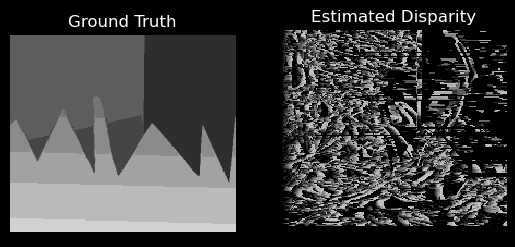

Procesing scanline  180
[[2.51755082e+00 5.03510164e+00 7.55265247e+00 ... 4.89670903e+03
  4.95994880e+03 4.96863302e+03]
 [           inf 5.59065720e+00 7.83043024e+00 ... 4.89270903e+03
  4.95994880e+03 4.96863302e+03]
 [           inf            inf 8.05265247e+00 ... 4.89087570e+03
  4.95172658e+03 4.96863302e+03]
 ...
 [           inf            inf            inf ... 4.88020903e+03
  4.92972658e+03 4.94413302e+03]
 [           inf            inf            inf ... 4.87670903e+03
  4.91922658e+03 4.94107746e+03]
 [           inf            inf            inf ... 4.87754236e+03
  4.89755991e+03 4.93157746e+03]]


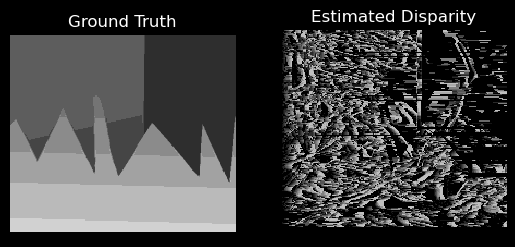

Procesing scanline  181
[[2.23977304e+00 5.14621275e+00 8.05265247e+00 ... 4.56954236e+03
  4.65122658e+03 4.70446635e+03]
 [           inf 5.75732387e+00 9.16376358e+00 ... 4.56832014e+03
  4.64683769e+03 4.69557746e+03]
 [           inf            inf 9.05265247e+00 ... 4.56648681e+03
  4.64255991e+03 4.69129969e+03]
 ...
 [           inf            inf            inf ... 4.56265347e+03
  4.61233769e+03 4.67157746e+03]
 [           inf            inf            inf ... 4.55998681e+03
  4.62250436e+03 4.65779969e+03]
 [           inf            inf            inf ... 4.55932014e+03
  4.60805991e+03 4.66696635e+03]]


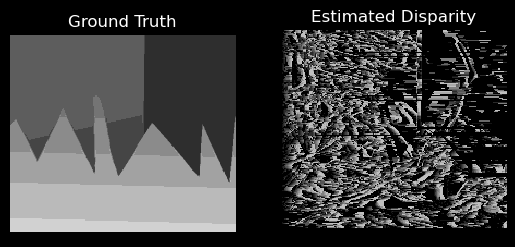

Procesing scanline  182
[[2.07310638e+00 4.14621275e+00 6.21931913e+00 ... 3.34493125e+03
  3.38022658e+03 3.39624413e+03]
 [           inf 5.31287942e+00 7.66376358e+00 ... 3.34232014e+03
  3.37355991e+03 3.39929969e+03]
 [           inf            inf 8.05265247e+00 ... 3.34232014e+03
  3.37039325e+03 3.39329969e+03]
 ...
 [           inf            inf            inf ... 3.32993125e+03
  3.36155991e+03 3.38024413e+03]
 [           inf            inf            inf ... 3.32815347e+03
  3.35622658e+03 3.38263302e+03]
 [           inf            inf            inf ... 3.32382014e+03
  3.35272658e+03 3.37696635e+03]]


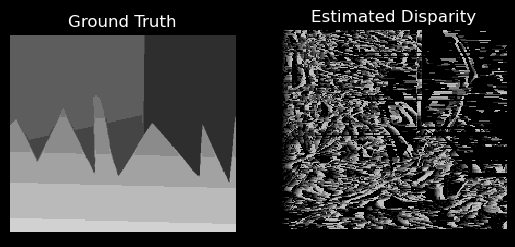

Procesing scanline  183
[[2.90643971e+00 4.97954609e+00 7.49709691e+00 ... 4.14587570e+03
  4.16467102e+03 4.18357746e+03]
 [           inf 6.81287942e+00 8.05265247e+00 ... 4.14176459e+03
  4.15844880e+03 4.18357746e+03]
 [           inf            inf 8.88598580e+00 ... 4.14176459e+03
  4.15267102e+03 4.17757746e+03]
 ...
 [           inf            inf            inf ... 4.13709792e+03
  4.14733769e+03 4.17202191e+03]
 [           inf            inf            inf ... 4.12909792e+03
  4.14733769e+03 4.16691080e+03]
 [           inf            inf            inf ... 4.11493125e+03
  4.13700436e+03 4.16591080e+03]]


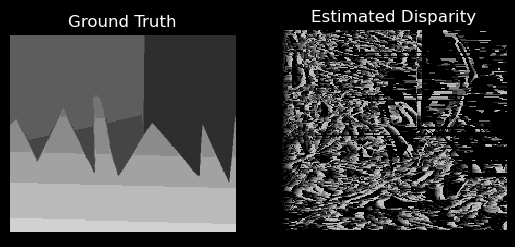

Procesing scanline  184
[[2.23977304e+00 5.64621275e+00 8.16376358e+00 ... 4.71409792e+03
  4.74300436e+03 4.75152191e+03]
 [           inf 5.31287942e+00 1.28859858e+01 ... 4.71559792e+03
  4.73511547e+03 4.75152191e+03]
 [           inf            inf 1.03304302e+01 ... 4.71426459e+03
  4.73633769e+03 4.74218858e+03]
 ...
 [           inf            inf            inf ... 4.71776459e+03
  4.73317102e+03 4.73818858e+03]
 [           inf            inf            inf ... 4.76093125e+03
  4.71911547e+03 4.73913302e+03]
 [           inf            inf            inf ... 4.79443125e+03
  4.72961547e+03 4.72485524e+03]]


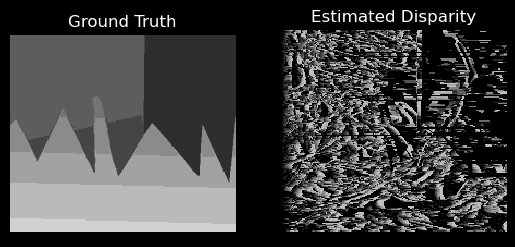

Procesing scanline  185
[[2.90643971e+00 4.97954609e+00 8.99709691e+00 ... 4.60037570e+03
  4.60511547e+03 4.63091080e+03]
 [           inf 5.92399053e+00 8.83043024e+00 ... 4.60220903e+03
  4.60344880e+03 4.63235524e+03]
 [           inf            inf 8.49709691e+00 ... 4.60220903e+03
  4.60339325e+03 4.61963302e+03]
 ...
 [           inf            inf            inf ... 4.67470903e+03
  4.61428214e+03 4.61441080e+03]
 [           inf            inf            inf ... 4.71115347e+03
  4.65011547e+03 4.60646635e+03]
 [           inf            inf            inf ... 4.72665347e+03
  4.67944880e+03 4.61729969e+03]]


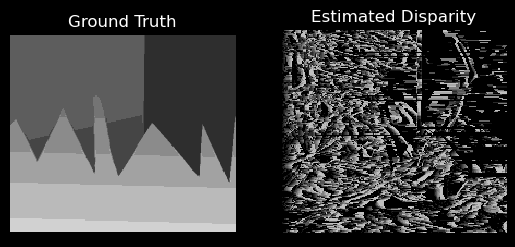

Procesing scanline  186
[[   8.73977304   11.64621275   13.66376358 ... 4880.82014071
  4900.83769153 4902.85524235]
 [          inf   16.25732387   22.66376358 ... 4889.15347404
  4902.89324708 4904.74413124]
 [          inf           inf   30.71931913 ... 4879.82014071
  4911.22658042 4905.24413124]
 ...
 [          inf           inf           inf ... 4928.82014071
  4967.33769153 4928.35524235]
 [          inf           inf           inf ... 5034.98680737
  4950.89324708 4938.57746457]
 [          inf           inf           inf ... 5028.82014071
  5057.05991375 4928.35524235]]


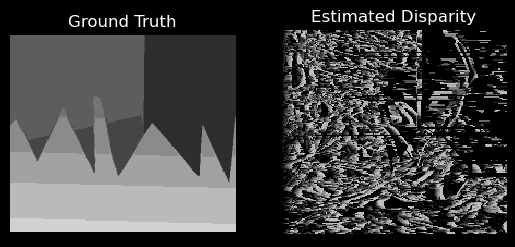

Procesing scanline  187
[[4.73977304e+00 8.14621275e+00 1.95526525e+01 ... 5.35198681e+03
  5.39450436e+03 5.43702191e+03]
 [           inf 1.57573239e+01 2.53859858e+01 ... 5.37232014e+03
  5.40172658e+03 5.44107746e+03]
 [           inf            inf 4.05526525e+01 ... 5.37593125e+03
  5.42305991e+03 5.44752191e+03]
 ...
 [           inf            inf            inf ... 5.39993125e+03
  5.46255991e+03 5.56557746e+03]
 [           inf            inf            inf ... 5.48348681e+03
  5.45300436e+03 5.51002191e+03]
 [           inf            inf            inf ... 5.49593125e+03
  5.54189325e+03 5.50024413e+03]]


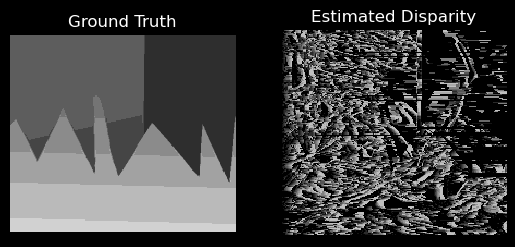

Procesing scanline  188
[[4.01755082e+00 1.40351016e+01 3.21082080e+01 ... 5.99715347e+03
  6.10672658e+03 6.19324413e+03]
 [           inf 1.79239905e+01 2.95526525e+01 ... 6.03176459e+03
  6.11772658e+03 6.24313302e+03]
 [           inf            inf 3.31082080e+01 ... 6.02032014e+03
  6.15622658e+03 6.25424413e+03]
 ...
 [           inf            inf            inf ... 6.02648681e+03
  6.18705991e+03 6.30974413e+03]
 [           inf            inf            inf ... 6.03715347e+03
  6.15039325e+03 6.33024413e+03]
 [           inf            inf            inf ... 6.07798681e+03
  6.16217102e+03 6.29024413e+03]]


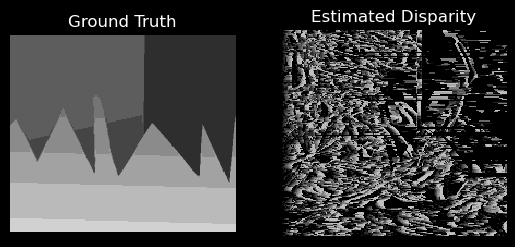

Procesing scanline  189
[[  10.01755082   26.25732387   44.33043024 ... 7177.76458515
  7321.94880264 7446.68857568]
 [          inf   35.25732387   49.33043024 ... 7151.09791848
  7355.00435819 7524.96635346]
 [          inf           inf   58.66376358 ... 7170.93125182
  7328.33769153 7559.68857568]
 ...
 [          inf           inf           inf ... 7206.2090296
  7334.83769153 7545.46635346]
 [          inf           inf           inf ... 7190.76458515
  7383.44880264 7538.52190902]
 [          inf           inf           inf ... 7138.43125182
  7368.00435819 7589.46635346]]


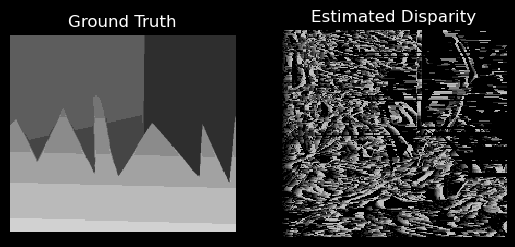

: 

In [7]:
# figure out size of image
imY = len(im1)
imX = len(im1[0])

# define maximum disparity 
maxDisp = 10

# set up pairwiseCosts - we will define a fixed cost of alpha for changing
# disparity or zero cost for staying the same
# 这里定义了一个视差变化的成本矩阵，如果视差保持不变则代价为零，如果改变则为alpha。
# 这种设置鼓励在视差图中的平滑过渡，类似于MRF中促进标签一致性的对势函数。
alpha = 1
pairwiseCosts = alpha*np.ones([maxDisp,maxDisp])-alpha*np.eye(maxDisp)

# initialize the disparity map that we will estimate
estDisp = np.zeros([imY,imX-maxDisp])

# define standard deviation of noise
# noiseSD = 6
noiseSD = 3

# display ground truth and estimated disparity
plt.close('all')
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(gtDisp, vmin=0,vmax=11, cmap='gray', extent=[0,len(gtDisp[0]),0,len(gtDisp)],interpolation='nearest')
ax1.axis('off')
ax1.set_title('Ground Truth')
ax2.axis('off')
plt.show()

# run through each line of image
for cY in range(imY):
    print('Procesing scanline ',cY)
    
    # define unary costs - we will not use the last few columns of the
    # image as the disparity might map the pixel outside the valid area of
    # the second image
    
    unaryCosts = np.zeros([maxDisp,imX-maxDisp])
    
    for cDisp in range(maxDisp):
        cost=np.zeros(imX-maxDisp)
        for cX in range(imX-maxDisp):
            pass
            #TODO - calculate cost for this disparity. This is the 
            #negative log likelihood, where the likelihood is a Gaussian
            #with a mean of the value (i.e. intensity) at the offset pixel 
            #in image2 and a standard deviation of "noiseSD". 
            # 对于每个可能的视差，计算该视差下的单元成本unary。成本是基于高斯分布的负对数似然，其中均值是第二幅图像在视差偏移后的像素值
            if cX - cDisp >= 0:
                diff = im1[cY, cX] - im2[cY, cX - cDisp]
                cost[cX] = -np.log(np.exp(-0.5 * (diff/noiseSD)**2) / (np.sqrt(2 * np.pi) * noiseSD))
            else:
                cost[cX] = float('inf')  # assign a high cost if disparity is not valid
        
        # TODO store this cost in the unaryCosts matrix
        unaryCosts[cDisp, :] = cost
            
    # TODO uncomment the line below and call the function that you wrote in the previous section (copy it
    # into the cell above)
    
    estDisp[cY,:] = np.transpose(dynamicProgram(unaryCosts,pairwiseCosts))

    # display solution so far
    f, (ax1, ax2) = plt.subplots(1, 2)
    #ax1.clear()
    ax1.imshow(gtDisp, vmin=0,vmax=11, cmap='gray', extent=[0,len(gtDisp[0]),0,len(gtDisp)],interpolation='nearest')
    ax1.axis('off')
    ax1.set_title('Ground Truth')
    #ax2.clear()
    ax2.imshow(estDisp, vmin=0,vmax=12, cmap='gray', extent=[0,len(estDisp[0]),0,len(estDisp)],interpolation='nearest')
    ax2.axis('off')
    ax2.set_title('Estimated Disparity')
    plt.show()
    
    
    
# TODO - investigate how different values of alpha and noiseSD affect the results

# TODO (optional) - rewrite the the "dynamicProgram" in the "dynamicProgramVec" function to make it more efficient. 
# Check the improvements by timining the function calls.

# TODO (optional) - you should be able to rewrite this (calculating unary costs) with fewer loops once you have
#the general idea so that it runs faster. Again you can check the speed improvements by timing them.

# TODO (optional)- adapt the algorithm so that it makes use of colour information